In [ ]:
!pip install -U 'scikit-learn<0.24'
!pip install sklearn-crfsuite

# YOU NEED TO RESTART THE RUNTIME!!!

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# Run this cell to mount your drive to this notebook in order to read the datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import re
import json
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## Read Dataset

In [3]:
# Put the folder path where the datasets are located
PATH = "/content/drive/My Drive/"

In [4]:
# function to read data, return list of tuples each tuple represents a token contains word, pos tag, chunk tag, and ner tag
def read_data(filename):
  temp_tuple_list = []
  tuple_list = []
  f = open(os.path.join(PATH, filename),"r")

  for line in f:
    if line !="\n":
      temp_tuple_list.append(tuple(line.replace("\n","").split(" ")))
    else:
        tuple_list.append(temp_tuple_list) 
        temp_tuple_list = []
  tuple_list.append(temp_tuple_list)
  f.close()
  return tuple_list

  

In [5]:
# read data with your custom function
train_data = read_data("train.txt")
val_data = read_data("valid.txt")
test_data = read_data("test.txt")

In [6]:
print(train_data[0])
print(test_data[0])
print(val_data[0])

[('-DOCSTART-', '-X-', '-X-', 'O')]
[('-DOCSTART-', '-X-', '-X-', 'O')]
[('-DOCSTART-', '-X-', '-X-', 'O')]


In [7]:
del train_data[0]
print(train_data[0])

[('EU', 'NNP', 'B-NP', 'B-ORG'), ('rejects', 'VBZ', 'B-VP', 'O'), ('German', 'JJ', 'B-NP', 'B-MISC'), ('call', 'NN', 'I-NP', 'O'), ('to', 'TO', 'B-VP', 'O'), ('boycott', 'VB', 'I-VP', 'O'), ('British', 'JJ', 'B-NP', 'B-MISC'), ('lamb', 'NN', 'I-NP', 'O'), ('.', '.', 'O', 'O')]


In [8]:
del test_data[0]
del val_data[0]

In [9]:
print(test_data[0])
print(val_data[0])

[('SOCCER', 'NN', 'B-NP', 'O'), ('-', ':', 'O', 'O'), ('JAPAN', 'NNP', 'B-NP', 'B-LOC'), ('GET', 'VB', 'B-VP', 'O'), ('LUCKY', 'NNP', 'B-NP', 'O'), ('WIN', 'NNP', 'I-NP', 'O'), (',', ',', 'O', 'O'), ('CHINA', 'NNP', 'B-NP', 'B-PER'), ('IN', 'IN', 'B-PP', 'O'), ('SURPRISE', 'DT', 'B-NP', 'O'), ('DEFEAT', 'NN', 'I-NP', 'O'), ('.', '.', 'O', 'O')]
[('CRICKET', 'NNP', 'B-NP', 'O'), ('-', ':', 'O', 'O'), ('LEICESTERSHIRE', 'NNP', 'B-NP', 'B-ORG'), ('TAKE', 'NNP', 'I-NP', 'O'), ('OVER', 'IN', 'B-PP', 'O'), ('AT', 'NNP', 'B-NP', 'O'), ('TOP', 'NNP', 'I-NP', 'O'), ('AFTER', 'NNP', 'I-NP', 'O'), ('INNINGS', 'NNP', 'I-NP', 'O'), ('VICTORY', 'NN', 'I-NP', 'O'), ('.', '.', 'O', 'O')]


# Create Gazetteer

In [ ]:
import urllib

In [ ]:
# load wikipedia pages
PATH2 = "/content/drive/My Drive/ColabNotebooks/445/wikipages/"

data = []

for filename in os.listdir(PATH2):
    if filename.endswith("json"): 
        print(filename)
        data.append(filename)

Copy of 10012100.json
Copy of 10023531.json
Copy of 10003244.json
Copy of 10015994.json
Copy of 1000449.json
Copy of 100131.json
Copy of 10002405.json
Copy of 10021200.json
Copy of 10024034.json
Copy of 1000616.json
Copy of 10059117.json
Copy of 1002327.json
Copy of 1000718.json
Copy of 100096.json
Copy of 10016649.json
Copy of 10025993.json
Copy of 1006661.json
Copy of 10059475.json
Copy of 10038125.json
Copy of 10037136.json
Copy of 100615.json
Copy of 100582.json
Copy of 10050207.json
Copy of 1006446.json
Copy of 10030.json
Copy of 1006317.json
Copy of 10037354.json
Copy of 10032080.json
Copy of 10045337.json
Copy of 10052417.json
Copy of 1003198.json
Copy of 1006151.json
Copy of 10033490.json
Copy of 10045535.json
Copy of 10049066.json
Copy of 10055024.json
Copy of 1003859.json
Copy of 10043973.json
Copy of 10030670.json
Copy of 10063176.json
Copy of 10137757.json
Copy of 10115.json
Copy of 10103783.json
Copy of 10107478.json
Copy of 1006912.json
Copy of 10074802.json
Copy of 10121

In [ ]:
# find interwiki links from the content of the pages

In [ ]:
gazlist1 = []
gazlist2 = []
for filename in data:
  path = PATH2 + filename
  f= open(path, "r")
  jsonfile = json.loads(f.read())
  url = jsonfile['url']
  title = jsonfile['title']
  x = re.findall(r' href=\"(.*?)"&gt;(.*?)&lt;\/a&gt', jsonfile['text'])
  for tupe in x: 
    mytuple = (tupe[1],dict(pagetitle = tupe[0]), dict(url = url))
    gazlist1.append(mytuple)
    gazlist2.append(tupe[0])
    gazlist2.append(tupe[1])
  gazlist2.append(title)
print(gazlist2)

['Plasmodium', 'Plasmodium', 'Giovannolaia', 'Giovannolaia', 'vertebrate', 'vertebrate', 'insect', 'insect', 'bird', 'bird', 'Plasmodium%20asanum', 'Plasmodium asanum', 'Plasmodium%20circumflexum', 'Plasmodium circumflexum', 'Plasmodium%20fallax', 'Plasmodium fallax', 'Plasmodium%20formosanum', 'Plasmodium formosanum', 'Plasmodium%20gabaldoni', 'Plasmodium gabaldoni', 'Plasmodium%20hegneri', 'Plasmodium hegneri', 'Plasmodium%20lophrae', 'Plasmodium lophrae', 'Plasmodium%20lophrae', 'Plasmodium lophrae', 'Plasmodium%20pediocetti', 'Plasmodium pediocetti', 'Plasmodium%20pinotti', 'Plasmodium pinotti', 'Plasmodium%20polare', 'Plasmodium polare', 'United%20States', 'United States of America', 'South%20Africa', 'South Africa', 'turkey%20%28bird%29', 'turkey', 'Meleagris%20gallopavo', 'Meleagris gallopavo', 'Francolin', 'Francolin', 'Francolinus%20swainsoni', 'Francolinus swainsoni', 'Plasmodium durae', 'Spanish%20language', 'Spanish', 'Nonprofit%20organization', 'non-profit', 'private%20uni

In [ ]:
# you can also define rules to improve your gazetteer

In [ ]:
#remove duplicates 1st to make everything shorter

In [ ]:
gazlist2 = list( dict.fromkeys(gazlist2) )
print(gazlist2)

['Plasmodium', 'Giovannolaia', 'vertebrate', 'insect', 'bird', 'Plasmodium%20asanum', 'Plasmodium asanum', 'Plasmodium%20circumflexum', 'Plasmodium circumflexum', 'Plasmodium%20fallax', 'Plasmodium fallax', 'Plasmodium%20formosanum', 'Plasmodium formosanum', 'Plasmodium%20gabaldoni', 'Plasmodium gabaldoni', 'Plasmodium%20hegneri', 'Plasmodium hegneri', 'Plasmodium%20lophrae', 'Plasmodium lophrae', 'Plasmodium%20pediocetti', 'Plasmodium pediocetti', 'Plasmodium%20pinotti', 'Plasmodium pinotti', 'Plasmodium%20polare', 'Plasmodium polare', 'United%20States', 'United States of America', 'South%20Africa', 'South Africa', 'turkey%20%28bird%29', 'turkey', 'Meleagris%20gallopavo', 'Meleagris gallopavo', 'Francolin', 'Francolinus%20swainsoni', 'Francolinus swainsoni', 'Plasmodium durae', 'Spanish%20language', 'Spanish', 'Nonprofit%20organization', 'non-profit', 'private%20university', 'private university', 'Mendoza%2C%20Argentina', 'Mendoza', 'Cuyo%20%28Argentina%29', 'Cuyo', 'architecture', 'l

In [ ]:
#I'll remove the ones that start with a lowercase letter
for item in gazlist2:
 # item = re.sub(r'\b[a-z]+\s*', "", item).strip()
  try:
    if(item[0].islower()):
      gazlist2.remove(item)
      print(item)
  except: 
    print("YA")
   

print(gazlist2)

vertebrate
bird
turkey%20%28bird%29
non-profit
private university
architecture
medicine
city
county%20seat
ward%20%28politics%29%23United%20States
mayor of Minneapolis
organized%20crime
prostitution
bookmaker
murder
per%20capita
photography
beagle
narcotic
sawtooth traps
legislation
mass
missa%20solemnis
soprano
bass
cantata
masses
youth%20organisation
prisoner%20of%20war
repatriation
diplomatic%20corps
von dem Bussche family
couple were married
fashion%20design
necktie
collar
depression%20%28mood%29
cancer
pneumonia
state%20funeral
acid-fast
opera
coloratura%20soprano
unincorporated%20area
company%20town
heavy%20metal%20music
new%20wave%20of%20British%20heavy%20metal
progressive%20rock
concert%20tour
plaque
rice%20wine
glutinous%20rice
sake
cheongju
aperitif
cooking
salt
mainland China
baijiu
rice baijiu
jiǔniàng
alcohol%20content
duck
sesame oil
cross
vertical
crossbeam
upside down
execution
emblem
floor%20plan
churches
plan%20view
cruciform
nave
chapel
apse
narthex
unicode
code poin

In [ ]:
for item in gazlist2:
  if "http" in item: 
    gazlist2.remove(item)
    item = urllib.parse.unquote(item)
    gazlist2.append(item)
    print(item)

http://australia.icbl.org/
http://yellowhousejalalabad.com/
http://australia.icbl.org/
http://australia.icbl.org/


In [ ]:
for item in gazlist2: 
  if ";" in item:
    item = item.replace(";", "")
  if "%" in item: 
    gazlist2.remove(item)
    item = urllib.parse.unquote(item)
    gazlist2.append(item)

print(gazlist2)

['Plasmodium', 'Giovannolaia', 'insect', 'Plasmodium asanum', 'Plasmodium circumflexum', 'Plasmodium fallax', 'Plasmodium formosanum', 'Plasmodium gabaldoni', 'Plasmodium hegneri', 'Plasmodium lophrae', 'Plasmodium pediocetti', 'Plasmodium pinotti', 'Plasmodium polare', 'United States of America', 'South Africa', 'turkey', 'Meleagris gallopavo', 'Francolin', 'Francolinus swainsoni', 'Plasmodium durae', 'Spanish', 'private%20university', 'Mendoza', 'Cuyo', 'law', 'engineering', 'Universidad de Mendoza', 'Minneapolis', 'Minnesota', 'United States', 'county seat', 'Hennepin County', 'Near North', 'Hawthorne', 'Jordan', 'Sumner-Glenwood%2C%20Minneapolis', 'Sumner-Glenwood', 'Dinkytown', 'Midtown', 'Uptown', 'American Institute of Architects', 'Washington', 'Nicollet', 'Minnesota Democratic-Farmer-Labor Party', 'Democratic Party', 'Minneapolis City Council', 'wards', 'Green Party', 'Jacob Frey', 'police', '"Doc" Ames', 'Minneapolis Police Department', 'organized criminals', 'Prohibition', '

In [ ]:
for item in gazlist2:
  try: 
    if "#" in item: 
      print(item)
      gazlist2.remove(item)
      split_string = item.split("#", 1)
      itemx = split_string[0]
      gazlist2.append(itemx)
      print(itemx)
    if "(" in item: 
      print(item)
      gazlist2.remove(item)
      split_string = item.split("(", 1)
      itemx = split_string[0]
      gazlist2.append(itemx)
      print(itemx)
  except:
    print("bleh")

Sanjak of Akka (Acre)
Sanjak of Akka 
League_of_Nations_mandate#Types_of_mandates Class A mandates
League_of_Nations_mandate
Interservice/Industry Training, Simulation and Education Conference (I/ITSEC)
Interservice/Industry Training, Simulation and Education Conference 
Rod (Bass Heavy) Tillman
Rod 
Treaty of Paris (1783)
Treaty of Paris 
Martin O'Connor (footballer)
Martin O'Connor 
The Hound of the Baskervilles (1978 film)
The Hound of the Baskervilles 
"Daubert v. Merrell Dow Pharmaceuticals, Inc." (1993)
"Daubert v. Merrell Dow Pharmaceuticals, Inc." 
How Can I Love You More (Mixes)
How Can I Love You More 
Montserrat (mountain)
Montserrat 
Cuyo (Argentina)
Cuyo 
Near North (neighborhood), Minneapolis
Near North 
Washington Avenue (Minneapolis)
Washington Avenue 
Democratic Party (United States)
Democratic Party 
Mass (music)
Mass 
Mass (liturgy)
Mass 
Ernst Eulenburg (musical editions)
Ernst Eulenburg 
Matthew Rose (bass)
Matthew Rose 
Tanganyika (territory)
Tanganyika 
90th Ligh

In [ ]:
for item in gazlist2: 
  if "_" in item: 
    gazlist2.remove(item)
    itemx = item.replace("_", " ")
    gazlist2.append(itemx)
    print(itemx)
  if ";" in item: 
    gazlist2.remove(item)
    print(item)
    itemx = item.replace(";", "")
    print(itemx)
    if "&amp" in itemx: 
      itemx = itemx.replace("&amp", "&")
    gazlist2.append(itemx)
    print(itemx)


Breitkopf &amp; Härtel
Breitkopf &amp Härtel
Breitkopf & Härtel
AT&amp;T
AT&ampT
AT&T
Lilo &amp; Stitch
Lilo &amp Stitch
Lilo & Stitch
O&amp;O
O&ampO
O&O
Top R&amp;B/Hip-Hop Albums
Top R&ampB/Hip-Hop Albums
Top R&B/Hip-Hop Albums
Pratt &amp; Whitney
Pratt &amp Whitney
Pratt & Whitney
Music &amp; Media
Music &amp Media
Music & Media
Procter &amp; Gamble
Procter &amp Gamble
Procter & Gamble
A&amp;W Root Beer
A&ampW Root Beer
A&W Root Beer
Breitkopf &amp; Härtel
Breitkopf &amp Härtel
Breitkopf & Härtel
Novello &amp; Co
Novello &amp Co
Novello & Co
H.&amp;nbsp;H. Asquith
H.&ampnbspH. Asquith
H.&nbspH. Asquith
AT&amp;T
AT&ampT
AT&T
Lilo &amp; Stitch
Lilo &amp Stitch
Lilo & Stitch
Top R&amp;B/Hip-Hop Albums
Top R&ampB/Hip-Hop Albums
Top R&B/Hip-Hop Albums
Pratt &amp; Whitney
Pratt &amp Whitney
Pratt & Whitney
Music &amp; Media
Music &amp Media
Music & Media
Procter &amp; Gamble
Procter &amp Gamble
Procter & Gamble
A&amp;W Root Beer
A&ampW Root Beer
A&W Root Beer
League of Nations mandate
Lea

In [ ]:
#Remove duplicates again
gazlist2 = list( dict.fromkeys(gazlist2) )


In [ ]:
for item in gazlist2: 
  if "nbsp" in item: 
    gazlist2.remove(item)
    itemx = item.replace("nbsp", "")
    gazlist2.append(itemx)
    print(itemx)

H.&H. Asquith


In [ ]:
for item in gazlist2: 
  if '"' in item: 
    gazlist2.remove(item)
    itemx = item.replace('"', '')
    gazlist2.append(itemx)
    print(itemx)

Doc Ames
tariff reform
RMS Olympic
The Winter Park Sinkhole
Billboard 200
documenta X
Miscreants of Taliwood
Love City Jalalabad
Aloysius Lucky Gordon
Daubert v. Merrell Dow Pharmaceuticals, Inc. 


In [ ]:
for item in gazlist2:
 # item = re.sub(r'\b[a-z]+\s*', "", item).strip()
 if(item.islower()):
   print(item)
   gazlist2.remove(item)
   



insect
turkey
private%20university
law
county seat
wards
police
organized criminals
per capita
bear
missa solemnis
youth organisation
prisoner of war
diplomatic corps
fashion design
depression
state funeral
coccobacilli
coloratura soprano
unincorporated community
company town
heavy metal
progressive rock
tour
rice wine
jiuniang
alcohol content
executed
floor plan
plan view
aisle
east
bumper sticker
picture hat
servant
working%20class
music hall
new liberalism
middle class
contraceptive
corset
chiffon
wax cylinders
enclosure
sod
scouting
ski resort
sexual%20orientation
constituent republic
convergence criteria
head of state
archipelago
procès-verbal
23rd-largest metropolitan area
67th-largest city
global%20city
1835 ambush
double entendre
cattle rancher
sugar mill
fording
theme park
historic district
gay nightclub
mass shooting
limestone
humid subtropical climate
peninsula
heat index
hail
wildfire
above mean sea level
1998 outbreak
26th-largest metro area
cruise ship
trauma center
neona

In [ ]:
for item in gazlist2:
  if "%" in item:
    print(item)
    gazlist2.remove(item)
    item = urllib.parse.unquote(item)
    gazlist2.append(item)
    print(item)

Sumner-Glenwood%2C%20Minneapolis
Sumner-Glenwood, Minneapolis
Wolfgang%20Amadeus%20Mozart
Wolfgang Amadeus Mozart
Leopold%20Mozart
Leopold Mozart
Archbishopric%20of%20Salzburg
Archbishopric of Salzburg
Joseph%20Haydn
Joseph Haydn
Provo%20%28movement%29
Provo (movement)
Washington%20State%20Route%20507
Washington State Route 507
East%20Asia
East Asia
Asian%20supermarket
Asian supermarket
wikt%3Acrossbeam
wikt:crossbeam
Labour%20movement
Labour movement
A.%20C.%20Bradley
A. C. Bradley
Aston%20Villa
Aston Villa
Somme%20%28department%29
Somme (department)
Boma%20%28enclosure%29
Boma (enclosure)
Nguni%20languages
Nguni languages
Serbia%20and%20Montenegro
Serbia and Montenegro
State%20Union%20of%20Serbia%20and%20Montenegro
State Union of Serbia and Montenegro
Schengen%20Area
Schengen Area
African%20Union
African Union
List%20of%20countries%20by%20GDP%20%28PPP%29%20per%20capita
List of countries by GDP (PPP) per capita
Cape%20Verdean%20escudo
Cape Verdean escudo
Battle%20of%20Maysalun
Battle 

In [ ]:
for item in gazlist2:
  if "wikt" in item:
    gazlist2.remove(item)

In [ ]:
for item in gazlist2:
  if "(" in item: 
    print(item)
    gazlist2.remove(item)
    split_string = item.split("(", 1)
    itemx = split_string[0]
    gazlist2.append(itemx)
    print(itemx)

Bass (voice type)
Bass 
Siegfried (opera)
Siegfried 
White Spirit (band)
White Spirit 
Cheongju (beverage)
Cheongju 
Treaty of London (1839)
Treaty of London 
1918 Clemenceau–Lloyd George Agreement (Middle East)
1918 Clemenceau–Lloyd George Agreement 
Manta (SeaWorld Orlando)
Manta 
Blood on the Dance Floor (duo)
Blood on the Dance Floor 
Orlando Predators (NAL)
Orlando Predators 
Nani (footballer)
Nani 
Lynx (Orlando)
Lynx 
West Palm Beach station (Brightline)
West Palm Beach station 
Descent (aeronautics)
Descent 
Whig Party (British political party)
Whig Party 
Board of Agriculture (1793–1822)
Board of Agriculture 
Saint John River (Bay of Fundy)
Saint John River 
Ian Byrne (politician)
Ian Byrne 
Cinna (plant)
Cinna 
Costs (law)
Costs 
Moving on Up (M People song)
Moving on Up 
Cabinet (government)
Cabinet 
Ayub Khan (President of Pakistan)
Ayub Khan 
Member of Parliament (United Kingdom)
Member of Parliament 
Home Secretary (United Kingdom)
Home Secretary 
Provo (movement)
Provo 


In [ ]:
for item in gazlist2:
  if "%" in item:
    print(item)
    gazlist2.remove(item)
    item = urllib.parse.unquote(item)
    gazlist2.append(item)
    print(item)
  if '"' in item: 
    gazlist2.remove(item)
    itemx = item.replace('"', '')
    gazlist2.append(itemx)
    print(itemx)
  if "(" in item: 
    print(item)
    gazlist2.remove(item)
    split_string = item.split("(", 1)
    itemx = split_string[0]
    gazlist2.append(itemx)
    print(itemx)

Cross%20of%20St.%20Peter
Cross of St. Peter
RMS Titanic
Hanna%20Pitkin
Hanna Pitkin
Agrostis%20stolonifera
Agrostis stolonifera
Penal%20law
Penal law
Intellectual%20property
Intellectual property
Invasive%20species%20in%20Australia
Invasive species in Australia
Holy Smoke (song)
Holy Smoke 
How Can I Love You More (Mixes)
How Can I Love You More 
Boma (enclosure)
Boma 
Miami (Amtrak station)
Miami 


In [ ]:
for item in gazlist2:
 # item = re.sub(r'\b[a-z]+\s*', "", item).strip()
 if(item.islower()):
   print(item)
   gazlist2.remove(item)

engineering
tenor
paradise
glutinous rice
chicken
cathedral
transept
industrial working class
village
2004 hurricane season
2007 outbreak
reggaeton
high-speed rail
type rating
aluminium-lithium
composite material
boundary layer control
ovoid
high-lift device
wingtip device
power density
ram air turbine
liquid-crystal display
aileron
déclassé
degrees
rationalism
sodomy
abandoned villages
lime
chemicals
star
stellar evolution
gravitational collapse
neutron star
union
1957 federal election
experience
accident analysis
voir dire
work-product doctrine
subpoena
temperance movement
fatal overdose
bog
roman à clef
http://australia.icbl.org/
sesame oil
evening glove
civis romanus sum
fusion reaction
tree line
head-up display
free market
intellectual property
roche moutonnée


In [ ]:
for item in gazlist2:
 # item = re.sub(r'\b[a-z]+\s*', "", item).strip()
  try: 
    if(item[0].islower()):
      print(item)
      gazlist2.remove(item)
  except: 
    print(item + "yaa")


new wave of British heavy metal
glyph
continental Europe
statue of Peter Pan
the European Commission
partitioning of the Ottoman Empire
downtown Orlando
the Wheel at ICON Park Orlando
weekend supplementary school for Japanese children
wingspan
spoiler
depressurisation
crossed something of a Rubicon
yaa
quartz
conflict over Gaza
hydrogen
physician
correlation
the Crown
cull
dusky antechinus
irrigation in Australia
documenta X
free trade
mountain pygmy possum


In [ ]:
for item in gazlist2: 
  if not item:
    print("cool")
    gazlist2.remove(item)

    

cool


In [ ]:
for item in gazlist2: 
  print(item)

Plasmodium
Giovannolaia
Plasmodium asanum
Plasmodium circumflexum
Plasmodium fallax
Plasmodium formosanum
Plasmodium gabaldoni
Plasmodium hegneri
Plasmodium lophrae
Plasmodium pediocetti
Plasmodium pinotti
Plasmodium polare
United States of America
South Africa
Meleagris gallopavo
Francolin
Francolinus swainsoni
Plasmodium durae
Spanish
Mendoza
Cuyo
Universidad de Mendoza
Minneapolis
Minnesota
United States
Hennepin County
Near North
Hawthorne
Jordan
Sumner-Glenwood
Dinkytown
Midtown
Uptown
American Institute of Architects
Washington
Nicollet
Minnesota Democratic-Farmer-Labor Party
Democratic Party
Minneapolis City Council
Green Party
Jacob Frey
Minneapolis Police Department
Prohibition
Kid Cann
Buffalo, New York
The New York Times
R. T. Rybak
Mayors Against Illegal Guns Coalition
New York City
Michael Bloomberg
Boston
Thomas Menino
Consulate
Minneapolis, Minnesota
Consul General
Vice Consul
Honorary Consul
Government of Minneapolis
San Mateo, California
California State Senator
Ruth C

In [ ]:
#most of the cells above are run twice or has been repeated bc for some reason I don't know, it doesn't get everything the first time.
#So run multiple times until there is no output.

In [ ]:
# print the size of your gazetteer
len(gazlist2)

2888

# Models

## Conditional Random Fields (CRF)

### Extract features for CRF

In [ ]:
!pip install sklearn_crfsuite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
from nltk.stem import PorterStemmer

nltk.download('stopwords')
from nltk.corpus import stopwords

import sklearn_crfsuite
from sklearn.metrics import make_scorer
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
from sklearn.model_selection import GridSearchCV
import scipy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn_crfsuite import scorers,CRF
from sklearn_crfsuite.metrics import flat_classification_report
from sklearn_crfsuite import metrics

In [ ]:
from sklearn_crfsuite import metrics as crf_metrics

In [ ]:
def wordshape(text):
    t1 = re.sub('[A-Z]', 'X',text)
    t2 = re.sub('[a-z]', 'x', t1)
    return re.sub('[0-9]', 'd', t2)

In [ ]:
def removeDuplicates(word):
  i = 0
  st = {}
  while i < len(word):
    if word[i] == st[i-1]:
      st[i] = word[i]
    else: 
      st[i] = word[i]



    if len(st)!=0 and st[-1]==word[i]:
            i+=1
            
    else:
            st.append(word[i])
            i+=1
    return "".join(i for i in st)


 

In [ ]:
def shortwordshape(text):
    t1 = re.sub('[A-Z]', 'X',text)
    t2 = re.sub('[a-z]', 'x', t1)
    t3 = re.sub('[0-9]', 'd', t2)
    return("".join(t3[i] for i in range(len(t3)) if i == 0 or not (t3[i-1] == t3[i])))

In [ ]:
def contains_digit(word):
  contains_digit = False
  for character in word:
    if character.isdigit():
        contains_digit = True
        return True
  return False

In [ ]:
def in_gazetteer(word):
  if word in gazlist2:
    return True
  else:
    return False

In [ ]:
def is_stopword(word):
  if word in stopwords.words("english"):
    return True
  else:
    return False

In [ ]:
def contains_hyphen(word):
  if "-" in word:
    return True
  else:
    return False
def up_dig_dash(word):
  dig = False

  if "-" in word:
    if word.isupper():
      for char in word:
        if(char.isdigit()):
          dig = True
      if(dig):
        return True
      else:
        return False
    else:
      return False
  else:
    return False


In [ ]:
ps = PorterStemmer()

In [ ]:
#I've decided to look at prefixes that could be negative(notice no "a" as in apathetic bc that'd be a problem)
#TA said they didn't need to be of length 4
#I thought having a negative prefix could be an important feature
negprefixlist = ["anti","contra","contro","il","im","in","ir","non","un","dis","an"]
def check_prefixes(word):
  for prefix in negprefixlist:
    if(word.startswith(prefix)& len(word)>len(prefix)):
      return True   
  return False
#Since people and places are usually nouns, I've decided to look at noun making suffixes, this time of length 4
nounsuffixlist=["ance","ence","ment","ness" "ship", "sion", "tion"]
def check_suffixes(word):
  if word[-4:] in nounsuffixlist:
    return True
  else:
    return False
  


In [ ]:
def token2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]
    chunk = sent[i][2]
    features = {
        'word' : word,       
        'stem': ps.stem(word),
        'postag': postag,
        'chunk':chunk,
        'word.isupper': word.isupper(),
        'word.istitle': word.istitle(),
        'word.isdigit':  word.isdigit(),
        'BOS': False,
        'EOS': False,
        'word shape': wordshape(word),
        'short word shape' : shortwordshape(word),
        'word.containsdigit':  contains_digit(word),
        'word.ingazetteer':  in_gazetteer(word),
        'word.isstopword':  is_stopword(word),
        'word.containshyphen':  contains_hyphen(word),
        'word.isuppercase,hasdigits,hasdash':  up_dig_dash(word),
        'word.negprefix': check_prefixes(word),
        'word.nounsuffix': check_suffixes(word)}
    
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word': word1,                        
            '-1:word.istitle':  word1.istitle(),
            '-1:word.isupper':  word1.isupper(),
            '-1:postag' : postag1,
            '-1:word shape': wordshape(word1),
            '-1:short word shape' : shortwordshape(word1),
            })
    else:
        features.update({'BOS': True})
        
    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word': word1,
            '+1:word.istitle' : word1.istitle(),
            '+1:word.isupper' : word1.isupper(),
            '+1:postag' : postag1,
            '+1:word shape': wordshape(word1),
            '+1:short word shape' : shortwordshape(word1),
           
        })
    else:
        features.update({'EOS': True})
                
    return features


In [ ]:
def sent2features(sent):
    return [token2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, postag, chunk, label in sent]


In [ ]:
sent2features(train_data[0])[0]

{'+1:postag': 'VBZ',
 '+1:short word shape': 'x',
 '+1:word': 'rejects',
 '+1:word shape': 'xxxxxxx',
 '+1:word.istitle': False,
 '+1:word.isupper': False,
 'BOS': True,
 'EOS': False,
 'chunk': 'B-NP',
 'postag': 'NNP',
 'short word shape': 'X',
 'stem': 'EU',
 'word': 'EU',
 'word shape': 'XX',
 'word.containsdigit': False,
 'word.containshyphen': False,
 'word.ingazetteer': False,
 'word.isdigit': False,
 'word.isstopword': False,
 'word.istitle': False,
 'word.isupper': True,
 'word.isuppercase,hasdigits,hasdash': False,
 'word.negprefix': False,
 'word.nounsuffix': False}

In [ ]:
# prepare inputs and labels
train_sents = [sent2features(s) for s in train_data]
val_sents = [sent2features(s) for s in val_data]
test_sents = [sent2features(s) for s in test_data]


In [ ]:
print(train_sents[10][10])

{'word': 'at', 'stem': 'at', 'postag': 'IN', 'chunk': 'B-PP', 'word.isupper': False, 'word.istitle': False, 'word.isdigit': False, 'BOS': False, 'EOS': False, 'word shape': 'xx', 'short word shape': 'x', 'word.containsdigit': False, 'word.ingazetteer': False, 'word.isstopword': True, 'word.containshyphen': False, 'word.isuppercase,hasdigits,hasdash': False, 'word.negprefix': False, 'word.nounsuffix': False, '-1:word': 'Fischler', '-1:word.istitle': True, '-1:word.isupper': False, '-1:postag': 'NNP', '-1:word shape': 'Xxxxxxxx', '-1:short word shape': 'Xx', '+1:word': 'an', '+1:word.istitle': False, '+1:word.isupper': False, '+1:postag': 'DT', '+1:word shape': 'xx', '+1:short word shape': 'x'}


In [ ]:
def getList(dict):
    list = []
    for key in dict.keys():
        list.append(key)
          
    return list


In [ ]:
def list_subtraction(list1, list2):
  list_difference = []
  for item in list1:
    if item not in list2:
      list_difference.append(item)

  return(list_difference)

In [ ]:
listofkeys = getList(train_sents[10][15])

In [ ]:
listofkeys

['word',
 'stem',
 'postag',
 'chunk',
 'word.isupper',
 'word.istitle',
 'word.isdigit',
 'BOS',
 'EOS',
 'word shape',
 'short word shape',
 'word.containsdigit',
 'word.ingazetteer',
 'word.isstopword',
 'word.containshyphen',
 'word.isuppercase,hasdigits,hasdash',
 'word.negprefix',
 'word.nounsuffix',
 '-1:word',
 '-1:word.istitle',
 '-1:word.isupper',
 '-1:postag',
 '-1:word shape',
 '-1:short word shape',
 '+1:word',
 '+1:word.istitle',
 '+1:word.isupper',
 '+1:postag',
 '+1:word shape',
 '+1:short word shape']

In [ ]:

listoffeats = []
templist =[]
count = 1
print(listofkeys)
while(len(listofkeys)!=count):
  a=0
  while a < count:
    templist.append(listofkeys[a])
    a = a +1
    print(templist)
    print(a)
    print(count)
  print("outside")
  imp = list_subtraction(listofkeys,templist)
  listoffeats.append(imp)
  print("feat:")
  print(listoffeats)
  templist = []
  count = count +1
 

['word', 'stem', 'postag', 'chunk', 'word.isupper', 'word.istitle', 'word.isdigit', 'BOS', 'EOS', 'word shape', 'short word shape', 'word.containsdigit', 'word.ingazetteer', 'word.isstopword', 'word.containshyphen', 'word.isuppercase,hasdigits,hasdash', 'word.negprefix', 'word.nounsuffix', '-1:word', '-1:word.istitle', '-1:word.isupper', '-1:postag', '-1:word shape', '-1:short word shape', '+1:word', '+1:word.istitle', '+1:word.isupper', '+1:postag', '+1:word shape', '+1:short word shape']
['word']
1
1
outside
feat:
[['stem', 'postag', 'chunk', 'word.isupper', 'word.istitle', 'word.isdigit', 'BOS', 'EOS', 'word shape', 'short word shape', 'word.containsdigit', 'word.ingazetteer', 'word.isstopword', 'word.containshyphen', 'word.isuppercase,hasdigits,hasdash', 'word.negprefix', 'word.nounsuffix', '-1:word', '-1:word.istitle', '-1:word.isupper', '-1:postag', '-1:word shape', '-1:short word shape', '+1:word', '+1:word.istitle', '+1:word.isupper', '+1:postag', '+1:word shape', '+1:short wor

In [ ]:
for item in listoffeats:
  print(item)
listoffeats.pop(-1)
listoffeats.pop(-1)
listoffeats.pop(-1)
listoffeats.pop(-1)
listoffeats.pop(-1)
listoffeats.pop(-1)
listoffeats.pop(-1)
listoffeats.pop(-1)
listoffeats.pop(-1)
listoffeats.pop(-1)
listoffeats.pop(-1)

print("allpopped")


['stem', 'postag', 'chunk', 'word.isupper', 'word.istitle', 'word.isdigit', 'BOS', 'EOS', 'word shape', 'short word shape', 'word.containsdigit', 'word.ingazetteer', 'word.isstopword', 'word.containshyphen', 'word.isuppercase,hasdigits,hasdash', 'word.negprefix', 'word.nounsuffix', '-1:word', '-1:word.istitle', '-1:word.isupper', '-1:postag', '-1:word shape', '-1:short word shape', '+1:word', '+1:word.istitle', '+1:word.isupper', '+1:postag', '+1:word shape', '+1:short word shape']
['postag', 'chunk', 'word.isupper', 'word.istitle', 'word.isdigit', 'BOS', 'EOS', 'word shape', 'short word shape', 'word.containsdigit', 'word.ingazetteer', 'word.isstopword', 'word.containshyphen', 'word.isuppercase,hasdigits,hasdash', 'word.negprefix', 'word.nounsuffix', '-1:word', '-1:word.istitle', '-1:word.isupper', '-1:postag', '-1:word shape', '-1:short word shape', '+1:word', '+1:word.istitle', '+1:word.isupper', '+1:postag', '+1:word shape', '+1:short word shape']
['chunk', 'word.isupper', 'word.is

In [ ]:
for item in listoffeats:
  print(item)

['stem', 'postag', 'chunk', 'word.isupper', 'word.istitle', 'word.isdigit', 'BOS', 'EOS', 'word shape', 'short word shape', 'word.containsdigit', 'word.ingazetteer', 'word.isstopword', 'word.containshyphen', 'word.isuppercase,hasdigits,hasdash', 'word.negprefix', 'word.nounsuffix', '-1:word', '-1:word.istitle', '-1:word.isupper', '-1:postag', '-1:word shape', '-1:short word shape', '+1:word', '+1:word.istitle', '+1:word.isupper', '+1:postag', '+1:word shape', '+1:short word shape']
['postag', 'chunk', 'word.isupper', 'word.istitle', 'word.isdigit', 'BOS', 'EOS', 'word shape', 'short word shape', 'word.containsdigit', 'word.ingazetteer', 'word.isstopword', 'word.containshyphen', 'word.isuppercase,hasdigits,hasdash', 'word.negprefix', 'word.nounsuffix', '-1:word', '-1:word.istitle', '-1:word.isupper', '-1:postag', '-1:word shape', '-1:short word shape', '+1:word', '+1:word.istitle', '+1:word.isupper', '+1:postag', '+1:word shape', '+1:short word shape']
['chunk', 'word.isupper', 'word.is

In [ ]:
listoffeats[0]

['stem',
 'postag',
 'chunk',
 'word.isupper',
 'word.istitle',
 'word.isdigit',
 'BOS',
 'EOS',
 'word shape',
 'short word shape',
 'word.containsdigit',
 'word.ingazetteer',
 'word.isstopword',
 'word.containshyphen',
 'word.isuppercase,hasdigits,hasdash',
 'word.negprefix',
 'word.nounsuffix',
 '-1:word',
 '-1:word.istitle',
 '-1:word.isupper',
 '-1:postag',
 '-1:word shape',
 '-1:short word shape',
 '+1:word',
 '+1:word.istitle',
 '+1:word.isupper',
 '+1:postag',
 '+1:word shape',
 '+1:short word shape']

In [ ]:
listoffeats.pop(0)
print(listoffeats)

[['postag', 'chunk', 'word.isupper', 'word.istitle', 'word.isdigit', 'BOS', 'EOS', 'word shape', 'short word shape', 'word.containsdigit', 'word.ingazetteer', 'word.isstopword', 'word.containshyphen', 'word.isuppercase,hasdigits,hasdash', 'word.negprefix', 'word.nounsuffix', '-1:word', '-1:word.istitle', '-1:word.isupper', '-1:postag', '-1:word shape', '-1:short word shape', '+1:word', '+1:word.istitle', '+1:word.isupper', '+1:postag', '+1:word shape', '+1:short word shape'], ['chunk', 'word.isupper', 'word.istitle', 'word.isdigit', 'BOS', 'EOS', 'word shape', 'short word shape', 'word.containsdigit', 'word.ingazetteer', 'word.isstopword', 'word.containshyphen', 'word.isuppercase,hasdigits,hasdash', 'word.negprefix', 'word.nounsuffix', '-1:word', '-1:word.istitle', '-1:word.isupper', '-1:postag', '-1:word shape', '-1:short word shape', '+1:word', '+1:word.istitle', '+1:word.isupper', '+1:postag', '+1:word shape', '+1:short word shape'], ['word.isupper', 'word.istitle', 'word.isdigit', 

In [ ]:
import copy

In [ ]:
temp = copy.deepcopy(train_sents)
print(temp[0])

[{'word': 'EU', 'stem': 'EU', 'postag': 'NNP', 'chunk': 'B-NP', 'word.isupper': True, 'word.istitle': False, 'word.isdigit': False, 'BOS': True, 'EOS': False, 'word shape': 'XX', 'short word shape': 'X', 'word.containsdigit': False, 'word.ingazetteer': False, 'word.isstopword': False, 'word.containshyphen': False, 'word.isuppercase,hasdigits,hasdash': False, 'word.negprefix': False, 'word.nounsuffix': False, '+1:word': 'rejects', '+1:word.istitle': False, '+1:word.isupper': False, '+1:postag': 'VBZ', '+1:word shape': 'xxxxxxx', '+1:short word shape': 'x'}, {'word': 'rejects', 'stem': 'reject', 'postag': 'VBZ', 'chunk': 'B-VP', 'word.isupper': False, 'word.istitle': False, 'word.isdigit': False, 'BOS': False, 'EOS': False, 'word shape': 'xxxxxxx', 'short word shape': 'x', 'word.containsdigit': False, 'word.ingazetteer': False, 'word.isstopword': False, 'word.containshyphen': False, 'word.isuppercase,hasdigits,hasdash': False, 'word.negprefix': False, 'word.nounsuffix': False, '-1:word':

In [ ]:
temp2 = copy.deepcopy(temp)

In [ ]:
oglist = []

In [ ]:

for liste in listoffeats: 
  for item in liste:
    for l in temp2:
      for dictt in l:
        dictt.pop(item, None)
  oglist.append(temp2)
  print(temp2[0])
  temp2 = copy.deepcopy(temp)



[{'word': 'EU', 'stem': 'EU'}, {'word': 'rejects', 'stem': 'reject'}, {'word': 'German', 'stem': 'german'}, {'word': 'call', 'stem': 'call'}, {'word': 'to', 'stem': 'to'}, {'word': 'boycott', 'stem': 'boycott'}, {'word': 'British', 'stem': 'british'}, {'word': 'lamb', 'stem': 'lamb'}, {'word': '.', 'stem': '.'}]
[{'word': 'EU', 'stem': 'EU', 'postag': 'NNP'}, {'word': 'rejects', 'stem': 'reject', 'postag': 'VBZ'}, {'word': 'German', 'stem': 'german', 'postag': 'JJ'}, {'word': 'call', 'stem': 'call', 'postag': 'NN'}, {'word': 'to', 'stem': 'to', 'postag': 'TO'}, {'word': 'boycott', 'stem': 'boycott', 'postag': 'VB'}, {'word': 'British', 'stem': 'british', 'postag': 'JJ'}, {'word': 'lamb', 'stem': 'lamb', 'postag': 'NN'}, {'word': '.', 'stem': '.', 'postag': '.'}]
[{'word': 'EU', 'stem': 'EU', 'postag': 'NNP', 'chunk': 'B-NP'}, {'word': 'rejects', 'stem': 'reject', 'postag': 'VBZ', 'chunk': 'B-VP'}, {'word': 'German', 'stem': 'german', 'postag': 'JJ', 'chunk': 'B-NP'}, {'word': 'call', '

In [ ]:
oglist.append(temp2)
print(len(oglist[1]))

14987


In [ ]:
len(oglist)

18

In [ ]:
temp3 = copy.deepcopy(val_sents)

In [ ]:
temp4 = copy.deepcopy(temp3)
vallist = []

In [ ]:
for liste in listoffeats: 
  for item in liste:
    for l in temp4:
      for dictt in l:
        dictt.pop(item, None)
  vallist.append(temp4)
  print(temp4[0])
  temp4 = copy.deepcopy(temp3)
 

[{'word': 'CRICKET', 'stem': 'cricket'}, {'word': '-', 'stem': '-'}, {'word': 'LEICESTERSHIRE', 'stem': 'leicestershir'}, {'word': 'TAKE', 'stem': 'take'}, {'word': 'OVER', 'stem': 'over'}, {'word': 'AT', 'stem': 'AT'}, {'word': 'TOP', 'stem': 'top'}, {'word': 'AFTER', 'stem': 'after'}, {'word': 'INNINGS', 'stem': 'in'}, {'word': 'VICTORY', 'stem': 'victori'}, {'word': '.', 'stem': '.'}]
[{'word': 'CRICKET', 'stem': 'cricket', 'postag': 'NNP'}, {'word': '-', 'stem': '-', 'postag': ':'}, {'word': 'LEICESTERSHIRE', 'stem': 'leicestershir', 'postag': 'NNP'}, {'word': 'TAKE', 'stem': 'take', 'postag': 'NNP'}, {'word': 'OVER', 'stem': 'over', 'postag': 'IN'}, {'word': 'AT', 'stem': 'AT', 'postag': 'NNP'}, {'word': 'TOP', 'stem': 'top', 'postag': 'NNP'}, {'word': 'AFTER', 'stem': 'after', 'postag': 'NNP'}, {'word': 'INNINGS', 'stem': 'in', 'postag': 'NNP'}, {'word': 'VICTORY', 'stem': 'victori', 'postag': 'NN'}, {'word': '.', 'stem': '.', 'postag': '.'}]
[{'word': 'CRICKET', 'stem': 'cricket

In [ ]:
len(vallist)

17

In [ ]:
vallist.append(temp3)
print(len(vallist[1]))
print(len(vallist))

3466
18


In [ ]:
print(vallist[0][0])
print(oglist[0][0])

[{'word': 'CRICKET', 'stem': 'cricket'}, {'word': '-', 'stem': '-'}, {'word': 'LEICESTERSHIRE', 'stem': 'leicestershir'}, {'word': 'TAKE', 'stem': 'take'}, {'word': 'OVER', 'stem': 'over'}, {'word': 'AT', 'stem': 'AT'}, {'word': 'TOP', 'stem': 'top'}, {'word': 'AFTER', 'stem': 'after'}, {'word': 'INNINGS', 'stem': 'in'}, {'word': 'VICTORY', 'stem': 'victori'}, {'word': '.', 'stem': '.'}]
[{'word': 'EU', 'stem': 'EU'}, {'word': 'rejects', 'stem': 'reject'}, {'word': 'German', 'stem': 'german'}, {'word': 'call', 'stem': 'call'}, {'word': 'to', 'stem': 'to'}, {'word': 'boycott', 'stem': 'boycott'}, {'word': 'British', 'stem': 'british'}, {'word': 'lamb', 'stem': 'lamb'}, {'word': '.', 'stem': '.'}]


In [ ]:

train_labels = [sent2labels(s) for s in train_data]
val_labels = [sent2labels(s) for s in val_data]
test_labels = [sent2labels(s) for s in test_data]

In [ ]:
train_labels[0]

['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']

In [ ]:

mylabels = ['B-LOC', 'B-ORG', 'B-PER', 'I-PER', 'B-MISC', 'I-ORG', 'I-LOC', 'I-MISC']

In [ ]:
sorted_labels = sorted(
    mylabels,
    key=lambda name: (name[1:], name[0])
)


In [ ]:
len(oglist)

18

In [ ]:
len(vallist)

18

In [ ]:
# start from the stem of the token and add features one by one and train a new model with each feature that you add


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

In [ ]:
table = []

In [ ]:
#its weighted, not macro, the names are old

In [ ]:
for item in oglist:
  index1= oglist.index(item)
  crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=20,
    all_possible_transitions=True,
    verbose = True)
 

  crf.fit(item, train_labels)

 
  y_pred = crf.predict(vallist[index1])
  # report = metrics.flat_classification_report(val_labels, y_pred, sorted_labels )
  print(index1)
  # print(report)
  # macro_avg = report['macro avg']
  macro_precision =  metrics.flat_precision_score(val_labels, y_pred,average='weighted', labels=mylabels)
  macro_recall = metrics.flat_recall_score(val_labels, y_pred,average='weighted', labels=mylabels)  
  macro_f1 = metrics.flat_f1_score(val_labels, y_pred,average='weighted', labels=mylabels)
  table.append([index1,macro_precision,macro_recall,macro_f1])
  print(table)

loading training data to CRFsuite: 100%|██████████| 14987/14987 [00:00<00:00, 25722.06it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 45934
Seconds required: 0.137

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 20
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.22  loss=312412.55 active=45846 feature_norm=1.00
Iter 2   time=0.33  loss=308808.02 active=45739 feature_norm=6.19
Iter 3   time=0.11  loss=235666.09 active=44922 feature_norm=4.84
Iter 4   time=0.54  loss=156836.69 active=45446 feature_norm=3.02
Iter 5   time=0.21  loss=151408.17 active=45655 feature_norm=3.45
Iter 6   time=0.11  loss=147665.17 active=45694 feature_norm=3.60
Iter 7   time=0.11  loss=140398.68 active=45748 feature_norm=4.83
Iter 8   time=0.11  loss=135785.92 active=45790 feature_norm=5.42
Iter 9   time=0.12  loss=127042.61 active=45807 feature_norm=8.33
Iter 1

loading training data to CRFsuite: 100%|██████████| 14987/14987 [00:00<00:00, 21146.13it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 46142
Seconds required: 0.157

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 20
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.23  loss=306802.33 active=46054 feature_norm=1.00
Iter 2   time=0.38  loss=278974.63 active=45940 feature_norm=5.78
Iter 3   time=0.13  loss=216412.49 active=45180 feature_norm=4.71
Iter 4   time=0.62  loss=131153.57 active=45690 feature_norm=3.51
Iter 5   time=0.13  loss=114116.70 active=45821 feature_norm=4.58
Iter 6   time=0.13  loss=94390.99 active=44631 feature_norm=7.25
Iter 7   time=0.12  loss=90640.30 active=44020 feature_norm=7.69
Iter 8   time=0.12  loss=75419.83 active=35935 feature_norm=11.38
Iter 9   time=0.12  loss=70484.60 active=35358 feature_norm=12.60
Iter 10 

loading training data to CRFsuite: 100%|██████████| 14987/14987 [00:00<00:00, 17723.55it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 46230
Seconds required: 0.182

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 20
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.25  loss=293667.70 active=46142 feature_norm=1.00
Iter 2   time=0.41  loss=214015.40 active=46001 feature_norm=4.16
Iter 3   time=0.14  loss=166762.51 active=45338 feature_norm=3.52
Iter 4   time=0.41  loss=130016.25 active=45827 feature_norm=3.04
Iter 5   time=0.14  loss=116919.80 active=46001 feature_norm=3.58
Iter 6   time=0.15  loss=105973.71 active=46077 feature_norm=4.22
Iter 7   time=0.14  loss=90194.72 active=45939 feature_norm=6.09
Iter 8   time=0.14  loss=79743.87 active=38526 feature_norm=7.48
Iter 9   time=0.15  loss=70496.99 active=36726 feature_norm=9.66
Iter 10  

loading training data to CRFsuite: 100%|██████████| 14987/14987 [00:00<00:00, 16122.18it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 46239
Seconds required: 0.196

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 20
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.28  loss=293633.19 active=46151 feature_norm=1.00
Iter 2   time=0.43  loss=213825.96 active=46010 feature_norm=4.16
Iter 3   time=0.14  loss=166610.35 active=45341 feature_norm=3.52
Iter 4   time=0.46  loss=129903.15 active=45838 feature_norm=3.03
Iter 5   time=0.15  loss=116898.89 active=46012 feature_norm=3.58
Iter 6   time=0.16  loss=105817.19 active=46081 feature_norm=4.22
Iter 7   time=0.15  loss=89612.66 active=45946 feature_norm=6.12
Iter 8   time=0.15  loss=78760.82 active=38564 feature_norm=7.55
Iter 9   time=0.14  loss=69664.76 active=36865 feature_norm=9.72
Iter 10  

loading training data to CRFsuite: 100%|██████████| 14987/14987 [00:01<00:00, 14972.40it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 46248
Seconds required: 0.221

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 20
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.29  loss=293561.08 active=46160 feature_norm=1.00
Iter 2   time=0.46  loss=214356.57 active=46013 feature_norm=4.18
Iter 3   time=0.15  loss=167393.77 active=45376 feature_norm=3.60
Iter 4   time=0.46  loss=125483.56 active=45834 feature_norm=3.16
Iter 5   time=0.16  loss=109596.65 active=46059 feature_norm=3.79
Iter 6   time=0.16  loss=99985.77 active=46090 feature_norm=4.47
Iter 7   time=0.15  loss=81445.58 active=40735 feature_norm=6.50
Iter 8   time=0.15  loss=72814.42 active=35599 feature_norm=8.83
Iter 9   time=0.17  loss=63507.56 active=34685 feature_norm=10.77
Iter 10  

loading training data to CRFsuite: 100%|██████████| 14987/14987 [00:01<00:00, 13675.47it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 46257
Seconds required: 0.261

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 20
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.31  loss=293258.33 active=46169 feature_norm=1.00
Iter 2   time=0.50  loss=212685.80 active=46022 feature_norm=4.15
Iter 3   time=0.16  loss=166367.57 active=45390 feature_norm=3.58
Iter 4   time=0.49  loss=124315.93 active=45850 feature_norm=3.16
Iter 5   time=0.16  loss=109515.36 active=46064 feature_norm=3.77
Iter 6   time=0.17  loss=99093.46 active=46096 feature_norm=4.53
Iter 7   time=0.17  loss=80087.80 active=39850 feature_norm=6.63
Iter 8   time=0.16  loss=74518.35 active=35608 feature_norm=9.30
Iter 9   time=0.17  loss=63664.55 active=35097 feature_norm=10.65
Iter 10  

loading training data to CRFsuite: 100%|██████████| 14987/14987 [00:01<00:00, 12735.93it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 46266
Seconds required: 0.270

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 20
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.32  loss=293077.14 active=46178 feature_norm=1.00
Iter 2   time=0.50  loss=212628.92 active=46028 feature_norm=4.15
Iter 3   time=0.17  loss=166064.43 active=45393 feature_norm=3.57
Iter 4   time=0.51  loss=126472.50 active=45866 feature_norm=3.12
Iter 5   time=0.17  loss=109375.31 active=46084 feature_norm=3.74
Iter 6   time=0.17  loss=99874.67 active=46104 feature_norm=4.36
Iter 7   time=0.17  loss=78888.91 active=41552 feature_norm=6.51
Iter 8   time=0.18  loss=71995.83 active=35920 feature_norm=8.83
Iter 9   time=0.17  loss=63213.36 active=35329 feature_norm=10.18
Iter 10  

loading training data to CRFsuite: 100%|██████████| 14987/14987 [00:01<00:00, 11505.61it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 46275
Seconds required: 0.294

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 20
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.34  loss=292567.50 active=46187 feature_norm=1.00
Iter 2   time=0.54  loss=211363.66 active=46037 feature_norm=4.14
Iter 3   time=0.18  loss=164679.40 active=45402 feature_norm=3.57
Iter 4   time=0.54  loss=126760.86 active=45864 feature_norm=3.12
Iter 5   time=0.18  loss=109371.25 active=46102 feature_norm=3.73
Iter 6   time=0.18  loss=100451.94 active=46087 feature_norm=4.19
Iter 7   time=0.19  loss=86569.06 active=46006 feature_norm=5.56
Iter 8   time=0.18  loss=73982.27 active=38590 feature_norm=7.02
Iter 9   time=0.18  loss=65731.26 active=36066 feature_norm=9.33
Iter 10  

loading training data to CRFsuite: 100%|██████████| 14987/14987 [00:01<00:00, 9794.77it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 47425
Seconds required: 0.312

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 20
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.36  loss=288569.42 active=47335 feature_norm=1.00
Iter 2   time=0.56  loss=195576.53 active=47172 feature_norm=3.87
Iter 3   time=0.18  loss=154708.63 active=46501 feature_norm=3.39
Iter 4   time=0.38  loss=151565.64 active=46915 feature_norm=3.21
Iter 5   time=0.19  loss=104586.40 active=47251 feature_norm=3.74
Iter 6   time=0.19  loss=98555.61 active=47249 feature_norm=4.13
Iter 7   time=0.19  loss=77183.44 active=44865 feature_norm=6.15
Iter 8   time=0.19  loss=67022.30 active=38131 feature_norm=8.26
Iter 9   time=0.20  loss=59926.42 active=36213 feature_norm=10.83
Iter 10  

loading training data to CRFsuite: 100%|██████████| 14987/14987 [00:02<00:00, 7441.15it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 47744
Seconds required: 0.361

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 20
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.36  loss=264570.72 active=47654 feature_norm=1.00
Iter 2   time=0.39  loss=184488.49 active=47438 feature_norm=3.92
Iter 3   time=0.19  loss=142904.57 active=46946 feature_norm=3.52
Iter 4   time=0.38  loss=116238.51 active=47118 feature_norm=3.35
Iter 5   time=0.20  loss=96727.66 active=47521 feature_norm=3.77
Iter 6   time=0.20  loss=90503.08 active=47522 feature_norm=4.18
Iter 7   time=0.21  loss=75624.15 active=42536 feature_norm=5.78
Iter 8   time=0.20  loss=64739.67 active=37476 feature_norm=7.96
Iter 9   time=0.20  loss=59521.13 active=35769 feature_norm=9.93
Iter 10  ti

loading training data to CRFsuite: 100%|██████████| 14987/14987 [00:01<00:00, 8869.53it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 47753
Seconds required: 0.382

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 20
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.40  loss=263814.41 active=47663 feature_norm=1.00
Iter 2   time=0.41  loss=183202.11 active=47450 feature_norm=3.92
Iter 3   time=0.20  loss=141710.45 active=46953 feature_norm=3.53
Iter 4   time=0.41  loss=114698.90 active=47127 feature_norm=3.36
Iter 5   time=0.21  loss=95482.62 active=47536 feature_norm=3.78
Iter 6   time=0.22  loss=89436.66 active=47524 feature_norm=4.18
Iter 7   time=0.20  loss=74737.51 active=42504 feature_norm=5.77
Iter 8   time=0.22  loss=64080.39 active=36789 feature_norm=7.94
Iter 9   time=0.21  loss=58926.06 active=34695 feature_norm=9.95
Iter 10  ti

loading training data to CRFsuite: 100%|██████████| 14987/14987 [00:01<00:00, 8395.80it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 47762
Seconds required: 0.385

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 20
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.41  loss=263806.34 active=47672 feature_norm=1.00
Iter 2   time=0.42  loss=183063.43 active=47459 feature_norm=3.92
Iter 3   time=0.21  loss=141501.66 active=46961 feature_norm=3.53
Iter 4   time=0.42  loss=114351.52 active=47135 feature_norm=3.37
Iter 5   time=0.22  loss=95139.89 active=47543 feature_norm=3.79
Iter 6   time=0.21  loss=88981.21 active=47530 feature_norm=4.20
Iter 7   time=0.21  loss=74138.62 active=42528 feature_norm=5.79
Iter 8   time=0.21  loss=63394.25 active=36805 feature_norm=8.00
Iter 9   time=0.23  loss=57783.33 active=34775 feature_norm=10.02
Iter 10  t

loading training data to CRFsuite: 100%|██████████| 14987/14987 [00:01<00:00, 8044.45it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 47771
Seconds required: 0.395

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 20
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.42  loss=260178.52 active=47681 feature_norm=1.00
Iter 2   time=0.43  loss=168331.16 active=47476 feature_norm=3.57
Iter 3   time=0.22  loss=134993.39 active=47035 feature_norm=3.24
Iter 4   time=0.23  loss=130552.05 active=47054 feature_norm=3.47
Iter 5   time=0.22  loss=95848.04 active=47550 feature_norm=3.79
Iter 6   time=0.22  loss=89119.61 active=47546 feature_norm=4.12
Iter 7   time=0.23  loss=79573.04 active=45082 feature_norm=5.02
Iter 8   time=0.24  loss=68005.49 active=41409 feature_norm=6.69
Iter 9   time=0.22  loss=59411.99 active=37193 feature_norm=8.58
Iter 10  ti

loading training data to CRFsuite: 100%|██████████| 14987/14987 [00:01<00:00, 7537.96it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 47780
Seconds required: 0.426

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 20
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.43  loss=260076.01 active=47690 feature_norm=1.00
Iter 2   time=0.46  loss=168172.38 active=47484 feature_norm=3.57
Iter 3   time=0.23  loss=134749.32 active=47044 feature_norm=3.25
Iter 4   time=0.24  loss=130575.09 active=47062 feature_norm=3.48
Iter 5   time=0.23  loss=95395.44 active=47560 feature_norm=3.80
Iter 6   time=0.23  loss=88763.53 active=47558 feature_norm=4.12
Iter 7   time=0.23  loss=79317.96 active=45127 feature_norm=5.02
Iter 8   time=0.23  loss=67960.71 active=41486 feature_norm=6.67
Iter 9   time=0.23  loss=59189.28 active=36893 feature_norm=8.59
Iter 10  ti

loading training data to CRFsuite: 100%|██████████| 14987/14987 [00:02<00:00, 7081.03it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 47789
Seconds required: 0.450

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 20
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.45  loss=260076.00 active=47699 feature_norm=1.00
Iter 2   time=0.48  loss=168172.38 active=47493 feature_norm=3.57
Iter 3   time=0.23  loss=134749.30 active=47053 feature_norm=3.25
Iter 4   time=0.23  loss=130575.06 active=47070 feature_norm=3.48
Iter 5   time=0.24  loss=95395.40 active=47568 feature_norm=3.80
Iter 6   time=0.24  loss=88763.47 active=47567 feature_norm=4.12
Iter 7   time=0.23  loss=79317.84 active=45136 feature_norm=5.02
Iter 8   time=0.23  loss=67960.46 active=41495 feature_norm=6.67
Iter 9   time=0.23  loss=59188.76 active=36902 feature_norm=8.59
Iter 10  ti

loading training data to CRFsuite: 100%|██████████| 14987/14987 [00:02<00:00, 6844.70it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 47798
Seconds required: 0.453

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 20
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.45  loss=260076.00 active=47699 feature_norm=1.00
Iter 2   time=0.49  loss=168172.38 active=47493 feature_norm=3.57
Iter 3   time=0.24  loss=134749.30 active=47053 feature_norm=3.25
Iter 4   time=0.23  loss=130575.06 active=47070 feature_norm=3.48
Iter 5   time=0.24  loss=95395.40 active=47568 feature_norm=3.80
Iter 6   time=0.24  loss=88763.47 active=47567 feature_norm=4.12
Iter 7   time=0.25  loss=79317.84 active=45136 feature_norm=5.02
Iter 8   time=0.24  loss=67960.46 active=41495 feature_norm=6.67
Iter 9   time=0.24  loss=59188.76 active=36902 feature_norm=8.59
Iter 10  ti

loading training data to CRFsuite: 100%|██████████| 14987/14987 [00:02<00:00, 6292.59it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 47807
Seconds required: 0.476

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 20
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.47  loss=260064.47 active=47708 feature_norm=1.00
Iter 2   time=0.50  loss=168137.82 active=47502 feature_norm=3.57
Iter 3   time=0.25  loss=134737.84 active=47061 feature_norm=3.25
Iter 4   time=0.25  loss=130475.76 active=47078 feature_norm=3.48
Iter 5   time=0.25  loss=95398.01 active=47577 feature_norm=3.80
Iter 6   time=0.26  loss=88761.01 active=47575 feature_norm=4.12
Iter 7   time=0.25  loss=79305.13 active=45137 feature_norm=5.02
Iter 8   time=0.25  loss=67937.24 active=41494 feature_norm=6.67
Iter 9   time=0.26  loss=59158.95 active=36897 feature_norm=8.60
Iter 10  ti

loading training data to CRFsuite: 100%|██████████| 14987/14987 [00:04<00:00, 3252.07it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 104967
Seconds required: 0.882

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 20
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.75  loss=226085.18 active=104684 feature_norm=1.00
Iter 2   time=0.39  loss=159269.50 active=103054 feature_norm=2.96
Iter 3   time=0.41  loss=127350.02 active=102459 feature_norm=2.77
Iter 4   time=0.37  loss=102126.72 active=102116 feature_norm=3.08
Iter 5   time=0.39  loss=91173.14 active=103353 feature_norm=3.38
Iter 6   time=0.39  loss=75579.15 active=93183 feature_norm=4.27
Iter 7   time=0.38  loss=65080.94 active=86881 feature_norm=5.38
Iter 8   time=0.40  loss=54263.73 active=77917 feature_norm=7.43
Iter 9   time=0.38  loss=49821.02 active=70525 feature_norm=9.71
Iter 

In [ ]:
#I've been told hyperparam tuning was optional and is not required. So I immeadiately started testing features.

In [ ]:
table

[[0, 0.5833073345787291, 0.1824944786702313, 0.2707430338455854],
 [1, 0.7351658802889324, 0.6221085667790306, 0.6658145161700477],
 [2, 0.6197309383302394, 0.5369057305591073, 0.5524991343159824],
 [3, 0.6621171807564, 0.5985121469254912, 0.6145922461487169],
 [4, 0.6381591053321803, 0.6301290247588051, 0.6309140232782099],
 [5, 0.6048644076187258, 0.6018830640474253, 0.5935907535690569],
 [6, 0.6019152950806997, 0.6117633383703359, 0.6004051860857175],
 [7, 0.6000657683899457, 0.548529582703708, 0.5585510928338951],
 [8, 0.6743446846615687, 0.6543066372195746, 0.6608283054340238],
 [9, 0.6768777538941592, 0.6679065442287574, 0.6658905802277102],
 [10, 0.6817678538299284, 0.6709287457863536, 0.6684385655852958],
 [11, 0.6817890470054988, 0.6550040683482506, 0.6601630623206257],
 [12, 0.6613177444233258, 0.6462861792398, 0.6500613572649098],
 [13, 0.6575994810858107, 0.6458212251540161, 0.6469442827364213],
 [14, 0.6572732284282934, 0.6454725095896781, 0.6465985147743968],
 [15, 0.6572

In [ ]:
feats = ["stem","+postag","+chunk","+uppercase","+title","+digit","+BOS", "+EOS","+wordshape", "+shortshape","+containsdigit", "+ingazetteer", "+isstopword", "+containshyphen", "+combo(dash,upper,num)", "+negprefix", "+nounsuffix", "+neighbours"]

In [ ]:
df = pd.DataFrame(table, columns=['Index', 'Precision', 'Recall', 'F1'])

In [ ]:
df2 = df.assign(Features = feats)

In [ ]:
df2

Index  Precision    Recall        F1                Features
0       0   0.583307  0.182494  0.270743                    stem
1       1   0.735166  0.622109  0.665815                 +postag
2       2   0.619731  0.536906  0.552499                  +chunk
3       3   0.662117  0.598512  0.614592              +uppercase
4       4   0.638159  0.630129  0.630914                  +title
5       5   0.604864  0.601883  0.593591                  +digit
6       6   0.601915  0.611763  0.600405                    +BOS
7       7   0.600066  0.548530  0.558551                    +EOS
8       8   0.674345  0.654307  0.660828              +wordshape
9       9   0.676878  0.667907  0.665891             +shortshape
10     10   0.681768  0.670929  0.668439          +containsdigit
11     11   0.681789  0.655004  0.660163            +ingazetteer
12     12   0.661318  0.646286  0.650061             +isstopword
13     13   0.657599  0.645821  0.646944         +containshyphen
14     14   0.657273  0.645473  0.646599  +combo(dash,upper,num)
15     15   0.657273  0.645473  0.646599              +negprefix
16     16   0.660458  0.643032  0.646885             +nounsuffix
17     17   0.767162  0.746368  0.753916             +neighbours

In [ ]:
#Above, we can see the best one is when neighbours are added, which is last. 
#So I want all the fatures
#Could be better to take out combo and has hyphen and maybe even negprefix, but I won't try.



In [ ]:
from sklearn.metrics import make_scorer,confusion_matrix

In [ ]:
crfX = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True,
    verbose = True)
 

crfX.fit(train_sents, train_labels, X_dev =val_sents, y_dev=val_labels)

 
y_pred = crfX.predict(test_sents)
print(index1)
#print(metrics.flat_classification_report(test_labels, y_pred, labels=sorted_labels, digits=3))
#The classification report error was fixed by me after long hours, and it worked. Next day, it didn't work again. So below is what you get.
w_precision =  metrics.flat_precision_score(test_labels, y_pred,average='weighted', labels=sorted_labels)
w_recall = metrics.flat_recall_score(test_labels, y_pred,average='weighted', labels=sorted_labels)  
w_f1 = metrics.flat_f1_score(test_labels, y_pred,average='weighted', labels=sorted_labels)
w_acc = metrics.flat_accuracy_score(test_labels, y_pred)
#get_confusion_matrix(test_labels, y_pred,labels=sorted_labels) CANT EVEN PRINT THE CONFUSION MATRIX 
#its not my fault. I've even defined a function above to avoid this. 
#Try it if you'd like. It sucks. 


loading training data to CRFsuite: 100%|██████████| 14987/14987 [00:04<00:00, 3224.93it/s]


loading dev data to CRFsuite: 100%|██████████| 3466/3466 [00:01<00:00, 2920.02it/s]



Holdout group: 2

Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 104967
Seconds required: 0.870

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.77  loss=226085.18 active=104684 precision=0.093  recall=0.111  F1=0.101  Acc(item/seq)=0.833 0.248  feature_norm=1.00
Iter 2   time=0.46  loss=159269.50 active=103054 precision=0.093  recall=0.111  F1=0.101  Acc(item/seq)=0.833 0.248  feature_norm=2.96
Iter 3   time=0.46  loss=127350.02 active=102459 precision=0.130  recall=0.111  F1=0.101  Acc(item/seq)=0.833 0.248  feature_norm=2.77
Iter 4   time=0.46  loss=102126.72 active=102116 precision=0.371  recall=0.338  F1=0.294  Acc(item/seq)=0.877 0.296  feature_norm=3.08
Iter 5   time=0.49  loss=91173.14 active

In [ ]:
print(w_precision)
print(w_acc)
print(w_f1)
print(w_recall)

0.8199428261915895
0.9604628736740598
0.8259905177786728
0.8335798816568047


## Recurrent Neural Network (RNN)

In [10]:
!pip install seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 2.2 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=da99a51f0d6815712667d1fca02ef43475a90031d95ff5b9f8ebdd43b7bbb109
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval


In [9]:
import tensorflow as tf
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Model, Input, Sequential
from keras.layers import Dense, Flatten, Embedding, Input, Dropout, LSTM, TimeDistributed, Bidirectional
from keras.callbacks import ModelCheckpoint

from gensim.models import Word2Vec
import gensim.downloader as api

In [11]:
import string

In [12]:
wordsonly=[]
sentences = []
for tuple_list in train_data:
  for a_tuple in tuple_list:
    op_string = a_tuple[0].translate(str.maketrans('', '', string.punctuation))
    sentences.append(op_string)
    sentences =  [ele for ele in sentences if ele.strip()]
  wordsonly.append(sentences)
  sentences = []

print(wordsonly)

[['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb'], ['Peter', 'Blackburn'], ['BRUSSELS', '19960822'], ['The', 'European', 'Commission', 'said', 'on', 'Thursday', 'it', 'disagreed', 'with', 'German', 'advice', 'to', 'consumers', 'to', 'shun', 'British', 'lamb', 'until', 'scientists', 'determine', 'whether', 'mad', 'cow', 'disease', 'can', 'be', 'transmitted', 'to', 'sheep'], ['Germany', 's', 'representative', 'to', 'the', 'European', 'Union', 's', 'veterinary', 'committee', 'Werner', 'Zwingmann', 'said', 'on', 'Wednesday', 'consumers', 'should', 'buy', 'sheepmeat', 'from', 'countries', 'other', 'than', 'Britain', 'until', 'the', 'scientific', 'advice', 'was', 'clearer'], ['We', 'do', 'nt', 'support', 'any', 'such', 'recommendation', 'because', 'we', 'do', 'nt', 'see', 'any', 'grounds', 'for', 'it', 'the', 'Commission', 's', 'chief', 'spokesman', 'Nikolaus', 'van', 'der', 'Pas', 'told', 'a', 'news', 'briefing'], ['He', 'said', 'further', 'scientific', 'study', 'was'

In [13]:
train_wordsonly=[]
sentences = []
tagsonly= []
sent = []
for tuple_list in train_data:
  for a_tuple in tuple_list:
    op_string = a_tuple[0]
    tag_string = a_tuple[3]
    sentences.append(op_string)
    sent.append(tag_string)
  train_wordsonly.append(sentences)
  tagsonly.append(sent)
  sentences = []
  sent = []
print(tagsonly)
print(train_wordsonly)

[['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O'], ['B-PER', 'I-PER'], ['B-LOC', 'O'], ['O', 'B-ORG', 'I-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-LOC', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'O', 'O', 'O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'O', 'O', 'B-PER', 'I-PER', 'I-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-PER', 'O', 

In [14]:
wordsonlyval=[]
sentences = []
tagsonlyval= []
sent = []
for tuple_list in val_data:
  for a_tuple in tuple_list:
    op_string = a_tuple[0]
    tag_string = a_tuple[3]
    sentences.append(op_string)
    sent.append(tag_string)

  wordsonlyval.append(sentences)
  tagsonlyval.append(sent)
  sentences = []
  sent = []

print(wordsonlyval)
print(tagsonlyval)

[['CRICKET', '-', 'LEICESTERSHIRE', 'TAKE', 'OVER', 'AT', 'TOP', 'AFTER', 'INNINGS', 'VICTORY', '.'], ['LONDON', '1996-08-30'], ['West', 'Indian', 'all-rounder', 'Phil', 'Simmons', 'took', 'four', 'for', '38', 'on', 'Friday', 'as', 'Leicestershire', 'beat', 'Somerset', 'by', 'an', 'innings', 'and', '39', 'runs', 'in', 'two', 'days', 'to', 'take', 'over', 'at', 'the', 'head', 'of', 'the', 'county', 'championship', '.'], ['Their', 'stay', 'on', 'top', ',', 'though', ',', 'may', 'be', 'short-lived', 'as', 'title', 'rivals', 'Essex', ',', 'Derbyshire', 'and', 'Surrey', 'all', 'closed', 'in', 'on', 'victory', 'while', 'Kent', 'made', 'up', 'for', 'lost', 'time', 'in', 'their', 'rain-affected', 'match', 'against', 'Nottinghamshire', '.'], ['After', 'bowling', 'Somerset', 'out', 'for', '83', 'on', 'the', 'opening', 'morning', 'at', 'Grace', 'Road', ',', 'Leicestershire', 'extended', 'their', 'first', 'innings', 'by', '94', 'runs', 'before', 'being', 'bowled', 'out', 'for', '296', 'with', 'Eng

In [ ]:
len(wordsonlyval)

3466

In [ ]:
len(tagsonlyval)

3466

In [15]:
wordsonlytest=[]
sentences = []
tagsonlytest= []
sent = []
for tuple_list in test_data:
  for a_tuple in tuple_list:
    op_string = a_tuple[0]
    tag_string = a_tuple[3]
    sentences.append(op_string)
    sent.append(tag_string)

  wordsonlytest.append(sentences)
  tagsonlytest.append(sent)
  sentences = []
  sent = []

print(wordsonlytest)
print(tagsonlytest)

[['SOCCER', '-', 'JAPAN', 'GET', 'LUCKY', 'WIN', ',', 'CHINA', 'IN', 'SURPRISE', 'DEFEAT', '.'], ['Nadim', 'Ladki'], ['AL-AIN', ',', 'United', 'Arab', 'Emirates', '1996-12-06'], ['Japan', 'began', 'the', 'defence', 'of', 'their', 'Asian', 'Cup', 'title', 'with', 'a', 'lucky', '2-1', 'win', 'against', 'Syria', 'in', 'a', 'Group', 'C', 'championship', 'match', 'on', 'Friday', '.'], ['But', 'China', 'saw', 'their', 'luck', 'desert', 'them', 'in', 'the', 'second', 'match', 'of', 'the', 'group', ',', 'crashing', 'to', 'a', 'surprise', '2-0', 'defeat', 'to', 'newcomers', 'Uzbekistan', '.'], ['China', 'controlled', 'most', 'of', 'the', 'match', 'and', 'saw', 'several', 'chances', 'missed', 'until', 'the', '78th', 'minute', 'when', 'Uzbek', 'striker', 'Igor', 'Shkvyrin', 'took', 'advantage', 'of', 'a', 'misdirected', 'defensive', 'header', 'to', 'lob', 'the', 'ball', 'over', 'the', 'advancing', 'Chinese', 'keeper', 'and', 'into', 'an', 'empty', 'net', '.'], ['Oleg', 'Shatskiku', 'made', 'sure'

In [16]:
w2v_model = Word2Vec(sentences = wordsonly,size = 100,window = 10, min_count=1)


w2v_model.train(wordsonly, total_examples=w2v_model.corpus_count, epochs=10)
w2v_model.init_sims(replace=True)

In [17]:
pre_model = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [18]:
def maplabels(liste):
  for sentence in liste:
    for word in sentence: 
      index = sentence.index(word)
      if(word == 'B-LOC'):
        sentence[index] = 1
      if(word == 'B-ORG'):
        sentence[index] = 2
      if(word == 'B-PER'):
        sentence[index] = 3
      if(word == 'B-MISC'):
        sentence[index] = 4
      if(word == 'I-LOC'):
        sentence[index] = 5
      if(word == 'I-ORG'):
        sentence[index] = 6
      if(word == 'I-PER'):
        sentence[index] = 7
      if(word == 'I-MISC'):
        sentence[index] = 8
      if(word == 'O'):
        sentence[index] = 0       
  return liste

In [19]:
t = Tokenizer(num_words=25000)
# fit the tokenizer on the documents
t.fit_on_texts(train_wordsonly)
t.word_index

{'the': 1,
 '.': 2,
 ',': 3,
 'of': 4,
 'in': 5,
 'to': 6,
 'a': 7,
 'and': 8,
 '(': 9,
 ')': 10,
 '"': 11,
 'on': 12,
 'said': 13,
 "'s": 14,
 'for': 15,
 '1': 16,
 '-': 17,
 'at': 18,
 'was': 19,
 '2': 20,
 '-docstart-': 21,
 '0': 22,
 '3': 23,
 'with': 24,
 'that': 25,
 'he': 26,
 'from': 27,
 'it': 28,
 'by': 29,
 'is': 30,
 ':': 31,
 'as': 32,
 '4': 33,
 'had': 34,
 'his': 35,
 'has': 36,
 'but': 37,
 'an': 38,
 'not': 39,
 'were': 40,
 'be': 41,
 'after': 42,
 'have': 43,
 'first': 44,
 'new': 45,
 'who': 46,
 'will': 47,
 'they': 48,
 '5': 49,
 'two': 50,
 'u.s.': 51,
 'been': 52,
 '$': 53,
 '--': 54,
 'their': 55,
 'beat': 56,
 'are': 57,
 '6': 58,
 'which': 59,
 'would': 60,
 'this': 61,
 'up': 62,
 'its': 63,
 'year': 64,
 'i': 65,
 'last': 66,
 'percent': 67,
 'out': 68,
 'we': 69,
 'thursday': 70,
 'one': 71,
 'million': 72,
 'over': 73,
 'government': 74,
 'wednesday': 75,
 'police': 76,
 '7': 77,
 'results': 78,
 'against': 79,
 'second': 80,
 'when': 81,
 '/': 82,
 'also

In [45]:
vocab_size = len(t.word_index) + 1 
vocab_size

21011

In [20]:
train_sequences = t.texts_to_sequences(train_wordsonly)
valid_sequences = t.texts_to_sequences(wordsonlyval)
test_sequences = t.texts_to_sequences(wordsonlytest)

In [ ]:
print("max sequence length:", max(len(s) for s in train_sequences))
print("min sequence length:", min(len(s) for s in train_sequences))
s = sorted(len(s) for s in train_sequences)
print("median sequence length:", s[len(s) // 2])
print("max word index:", max(max(seq) for seq in train_sequences if len(seq) > 0))

max sequence length: 113
min sequence length: 0
median sequence length: 9
max word index: 21010


In [21]:
a = 0
for b in train_data:
  if len(b)>a:
    print(len(b))
    a = len(b)
for c in val_data: 
  if len(c)>a:
    a = len(c)
for d in test_data:
  if(len(d)>a):
    a = len(d)
print(a)


9
30
31
33
40
47
52
54
58
60
62
78
113
124


In [22]:
train_y= maplabels(tagsonly)
print(train_y)
train_count = []
count = 0
for sentence in train_y: 
  for num in sentence: 
    count = count + 1
  train_count.append(count)
  count = 0
print(train_count)

[[2, 0, 4, 0, 0, 0, 4, 0, 0], [3, 7], [1, 0], [0, 2, 6, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 2, 6, 0, 0, 0, 3, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 7, 7, 7, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 6, 0], [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [3, 0, 4, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 8, 8, 0, 4, 0, 0, 0, 0, 0, 0], [0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [4, 0, 0, 3, 7, 7, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0], [0, 1, 0, 1, 0, 3, 0, 0, 0], [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [23]:
val_y = maplabels(tagsonlyval)
val_count = []
count = 0
print(val_y)
for sentence in val_y: 
  for num in sentence: 
    count = count + 1
  val_count.append(count)
  count = 0
print(val_count)

[[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0], [4, 8, 0, 3, 7, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0], [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 7, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 7, 0, 3, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0], [3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 2, 0, 3, 7, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0], [0, 0, 0, 0, 0, 1, 0, 3, 7, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [24]:
test_y = maplabels(tagsonlytest)
test_count = []
count = 0
print(test_y)
for sentence in test_y: 
  for num in sentence: 
    count = count + 1
  test_count.append(count)
  count = 0
print(test_count)

[[0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0], [3, 7], [1, 0, 1, 5, 5, 0], [1, 0, 0, 0, 0, 0, 4, 8, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 3, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0], [3, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 4, 0, 0, 0, 0, 0, 4, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 8, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [3, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 7, 0, 0, 0, 4, 0, 0, 0, 3, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 3, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0], [3, 7, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0], [3, 0, 0, 0, 0, 0, 0,

In [25]:
MAX_SEQUENCE_LENGTH = 124

In [26]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing import sequence

In [27]:
X_train = sequence.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_valid = sequence.pad_sequences(valid_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test = sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [28]:
y_train = sequence.pad_sequences(train_y, maxlen=MAX_SEQUENCE_LENGTH)
y_valid = sequence.pad_sequences(val_y, maxlen=MAX_SEQUENCE_LENGTH)
y_test = sequence.pad_sequences(test_y, maxlen=MAX_SEQUENCE_LENGTH)

In [29]:
np.set_printoptions(threshold=np.inf)

In [30]:
y_test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0], dtype=int32)

In [147]:
X_test.shape


(3684, 124)

In [148]:
y_valid.shape

(3466, 124)

In [31]:
y_train = np.array([to_categorical(i, num_classes=9) for i in y_train])


In [32]:
y_valid = np.array([to_categorical(i, num_classes=9) for i in y_valid])
y_test = np.array([to_categorical(i, num_classes=9) for i in y_test])

In [151]:
y_valid[0]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1.

In [152]:
y_test[0]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1.

In [153]:
len(y_test[0])

124

In [154]:
y_train.shape

(14987, 124, 9)

In [33]:
from numpy import argmax

In [39]:
np.set_printoptions(threshold=np.inf)

In [34]:
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras.utils import plot_model

In [35]:
def __get_embedding_dict(word2vec_model):
    embedding_dict = {}
    vocab = [(word, word2vec_model.wv[word]) for word, vectors in word2vec_model.wv.vocab.items()]

    for i in range(len(vocab)):
        word = vocab[i][0]
        vectors = vocab[i][1]
        embedding_dict[word] = vectors

    return embedding_dict

In [36]:
def get_embedding_matrix(word2vec_model, word2id, embeddings_dict):
    """
    Get the embedding matrix of the word2vec model
    :param model_filepath: the file path to the pre-build word2vec model
    :param word2id: the directory mapping from word to id
    :return: the embedding matrix of the word2vec model
    """
    embedding_matrix = np.zeros((len(word2id) + 1, word2vec_model.vector_size))
    for word, idx in word2id.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix 

In [37]:
embeddings_dict =  __get_embedding_dict(w2v_model)
embedding_matrix = get_embedding_matrix(w2v_model, t.word_index, embeddings_dict)

In [38]:
embeddings_dict2 = embeddings_dict =  __get_embedding_dict(pre_model)
embedding_matrix2 = get_embedding_matrix(pre_model, t.word_index, embeddings_dict2)

In [39]:
from keras import optimizers

In [186]:
X_train[0].shape

(124,)

In [175]:
#Randomly init

In [156]:
embedding_dim=100
lstm_units=124
max_len=124
num_tags = 9
input_word = Input(shape = (max_len,))
model = Embedding(vocab_size, 100, input_length = 124, trainable=True)(input_word)
model = Bidirectional(LSTM(units=embedding_dim,return_sequences=True))(model)
model = Bidirectional(LSTM(units=embedding_dim,return_sequences=True))(model)
out = TimeDistributed(Dense(num_tags,activation = 'softmax'))(model)
model = Model(input_word,out)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 124)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 124, 100)          2101100   
                                                                 
 bidirectional_4 (Bidirectio  (None, 124, 200)         160800    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 124, 200)         240800    
 nal)                                                            
                                                                 
 time_distributed_2 (TimeDis  (None, 124, 9)           1809      
 tributed)                                                       
                                                           

In [157]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [40]:
def fixPredictions(test_data,preds):
    print("Shape of Test Data Array",test_data.shape)
  
    y_pred=np.argmax(preds,axis=2)
    print(y_pred.shape)
    print(y_pred[0])
    num_test_data=test_data.shape[0]
    print("Number of Test Data Points ",num_test_data)
    pred = y_pred.tolist()
    print(type(y_pred))
    print(type(y_pred[0]))
    
    # for i in range(num_test_data):
      
    #     y=list(y_pred[i])
    #     pred.extend(y)

    # lstval = [ dct.get(k, your_fav_default) for k in lst ]
    
    pred = maplabelsback(pred)
   
    return pred

In [158]:
history = model.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size = 64,epochs = 8)

Epoch 1/8
235/235 [==============================] - 14s 39ms/step - loss: 0.1278 - accuracy: 0.9775 - val_loss: 0.0868 - val_accuracy: 0.9800
Epoch 2/8
235/235 [==============================] - 8s 33ms/step - loss: 0.0429 - accuracy: 0.9870 - val_loss: 0.1235 - val_accuracy: 0.9804
Epoch 3/8
235/235 [==============================] - 8s 33ms/step - loss: 0.0224 - accuracy: 0.9927 - val_loss: 0.1471 - val_accuracy: 0.9814
Epoch 4/8
235/235 [==============================] - 8s 33ms/step - loss: 0.0137 - accuracy: 0.9957 - val_loss: 0.1578 - val_accuracy: 0.9826
Epoch 5/8
235/235 [==============================] - 8s 33ms/step - loss: 0.0076 - accuracy: 0.9979 - val_loss: 0.1643 - val_accuracy: 0.9830
Epoch 6/8
235/235 [==============================] - 8s 33ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.1735 - val_accuracy: 0.9826
Epoch 7/8
235/235 [==============================] - 8s 33ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.1817 - val_accuracy: 0.9831
Epoch

In [159]:
preds=model.predict(X_test)

In [53]:
type(preds[0][0][0])

numpy.float32

In [160]:
preds[0]

array([[9.99980450e-01, 6.43997623e-07, 2.85008753e-07, 4.45928379e-07,
        1.41014916e-05, 1.36625329e-06, 1.87450965e-07, 1.98347323e-07,
        2.41188286e-06],
       [9.99999404e-01, 1.19932171e-08, 3.86115362e-09, 1.30656286e-08,
        4.07517007e-07, 1.93841032e-08, 1.82942295e-09, 2.84523405e-09,
        6.96993325e-08],
       [9.99999881e-01, 3.00337377e-09, 1.04342868e-09, 3.84335985e-09,
        1.04921313e-07, 2.05974660e-09, 2.17581925e-10, 3.46529749e-10,
        1.28007329e-08],
       [9.99999881e-01, 1.64647285e-09, 7.57709451e-10, 2.56750132e-09,
        6.41527791e-08, 7.39632189e-10, 9.98272021e-11, 1.37319378e-10,
        6.78010714e-09],
       [1.00000000e+00, 1.12855114e-09, 6.86881219e-10, 2.04102202e-09,
        4.96018977e-08, 4.17844009e-10, 6.80162870e-11, 8.12788517e-11,
        5.00616126e-09],
       [1.00000000e+00, 8.47302173e-10, 6.47695508e-10, 1.67054903e-09,
        4.11458174e-08, 2.86611151e-10, 5.26628706e-11, 5.68539105e-11,
        4.1

In [161]:
y_pred = fixPredictions(X_test, preds)


Shape of Test Data Array (3684, 124)
(3684, 124)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0]
Number of Test Data Points  3684
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [41]:
def maplabelsback(liste):
  
  for sentence in liste:
    
    for word in sentence:
      # sentence = sentence.astype(int)
      # sally = sentence.tolist()
      # print(type(sentence))
      # print(type(word))
      # print(type(liste))
      index = sentence.index(word)
      if(word == 1):
        sentence[index] = 'B-LOC'
      if(word == 2):
        sentence[index] = 'B-ORG'
      if(word == 3):
        sentence[index] = 'B-PER'
      if(word == 4):
        sentence[index] ='B-MISC'
      if(word == 5):
        sentence[index] = 'I-LOC'
      if(word == 6):
        sentence[index] = 'I-ORG'
      if(word == 7):
        sentence[index] = 'I-PER'
      if(word == 8):
        sentence[index] = 'I-MISC'
      if(word == 0):
        sentence[index] = 'O'     
  return liste

In [43]:
y_true = maplabelsback(tagsonlytest)
print(y_true)

[['O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'B-PER', 'O', 'O', 'O', 'O'], ['B-PER', 'I-PER'], ['B-LOC', 'O', 'B-LOC', 'I-LOC', 'I-LOC', 'O'], ['B-LOC', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'O'], ['B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'B-MISC', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O'

In [125]:
len(y_pred)

3684

In [166]:
reversecount = []
for sentence in y_pred:
  index = y_pred.index(sentence)
  a = test_count[index]*-1
  reversecount.append(a)
  print(a)
  new_sentence = sentence[a:]
  y_pred[index] = new_sentence

print(y_pred)

-12
-2
-6
-25
-25
-42
-23
-17
-18
-28
-38
-12
-31
-16
-21
-9
-17
-20
-1
-26
-17
-13
-1
-11
-2
-4
-26
-36
-34
-29
-14
-15
-19
-13
-66
-1
-10
-6
-21
-32
-11
-31
-15
-22
-21
-25
-19
-30
-71
-72
-1
-6
-4
-5
-7
-1
-8
-7
-7
-7
-7
-7
-7
-7
-7
-7
-1
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-1
-8
-6
-11
-8
-2
-12
-5
-4
-8
-9
-3
-13
-8
-8
-8
-8
-8
-1
-9
-5
-4
-4
-8
-3
-1
-10
-10
-7
-7
-5
-5
-7
-7
-5
-5
-5
-7
-10
-18
-15
-15
-6
-3
-8
-8
-8
-7
-5
-9
-6
-6
-8
-11
-5
-8
-9
-11
-3
-13
-13
-13
-4
-8
-10
-1
-9
-2
-6
-7
-4
-1
-6
-2
-27
-33
-28
-23
-24
-1
-12
-2
-33
-27
-29
-29
-29
-1
-5
-2
-6
-9
-9
-2
-8
-9
-10
-9
-8
-8
-2
-9
-8
-9
-9
-9
-8
-2
-8
-8
-8
-8
-8
-9
-2
-9
-8
-9
-9
-8
-9
-1
-9
-2
-2
-17
-30
-28
-45
-36
-37
-39
-32
-35
-2
-124
-80
-1
-8
-2
-56
-42
-12
-24
-23
-9
-1
-9
-2
-25
-32
-27
-16
-27
-23
-2
-8
-23
-23
-14
-1
-1
-6
-4
-3
-10
-4
-5
-1
-8
-2
-2
-28
-22
-37
-25
-26
-20
-23
-15
-23
-23
-25
-29
-21
-1
-10
-2
-5
-11
-2
-7
-8
-7
-7
-5
-6
-7
-8
-5
-5
-5
-7
-6
-12
-2
-11
-12
-4
-1
-5
-7
-5
-5
-7
-5
-5
-7
-1

In [127]:
reversecount[212]

-124

In [128]:
reversecount[-1]

0

In [94]:
len(test_count)

3684

In [42]:
from seqeval.metrics import f1_score
from seqeval.metrics import precision_score
from seqeval.metrics import accuracy_score
from seqeval.metrics import recall_score
from seqeval.metrics import classification_report

In [98]:
len(y_pred)

3684

In [99]:
len(y_true)

3684

In [101]:
y_true[-1]

[]

In [173]:
test_count[-1]

0

In [174]:
for num in test_count:
  if num == 0:
    print("waa")

waa


In [169]:
y_pred[-1] = [] #Gotta do this bc of the way I do it above. which is y_pred[0:] so it takes them all since 0 doesn't have a negative. But that's the only 0.

In [170]:
len_true = list(map(len, y_true))
print(len_true)
len_pred = list(map(len, y_pred))
print(len_pred)

[12, 2, 6, 25, 25, 42, 23, 17, 18, 28, 38, 12, 31, 16, 21, 9, 17, 20, 1, 26, 17, 13, 1, 11, 2, 4, 26, 36, 34, 29, 14, 15, 19, 13, 66, 1, 10, 6, 21, 32, 11, 31, 15, 22, 21, 25, 19, 30, 71, 72, 1, 6, 4, 5, 7, 1, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 8, 6, 11, 8, 2, 12, 5, 4, 8, 9, 3, 13, 8, 8, 8, 8, 8, 1, 9, 5, 4, 4, 8, 3, 1, 10, 10, 7, 7, 5, 5, 7, 7, 5, 5, 5, 7, 10, 18, 15, 15, 6, 3, 8, 8, 8, 7, 5, 9, 6, 6, 8, 11, 5, 8, 9, 11, 3, 13, 13, 13, 4, 8, 10, 1, 9, 2, 6, 7, 4, 1, 6, 2, 27, 33, 28, 23, 24, 1, 12, 2, 33, 27, 29, 29, 29, 1, 5, 2, 6, 9, 9, 2, 8, 9, 10, 9, 8, 8, 2, 9, 8, 9, 9, 9, 8, 2, 8, 8, 8, 8, 8, 9, 2, 9, 8, 9, 9, 8, 9, 1, 9, 2, 2, 17, 30, 28, 45, 36, 37, 39, 32, 35, 2, 124, 80, 1, 8, 2, 56, 42, 12, 24, 23, 9, 1, 9, 2, 25, 32, 27, 16, 27, 23, 2, 8, 23, 23, 14, 1, 1, 6, 4, 3, 10, 4, 5, 1, 8, 2, 2, 28, 22, 37, 25, 26, 20, 23, 15, 23, 23, 25, 29, 21, 1, 10, 2, 5, 11, 2, 7, 8, 7, 7, 5, 6, 7, 8, 5, 5, 5, 7, 6, 12, 2, 11, 12, 4, 1, 5, 7, 5, 5, 7, 5, 5, 7, 1

In [171]:
for el in len_true:
  index = len_true.index(el)
  if(el != len_pred[index]):
    print(el)
    print(index)


In [172]:
print("classification report: ")
print(classification_report(y_true, y_pred))

classification report: 
              precision    recall  f1-score   support

         LOC       0.34      0.34      0.34      1668
        MISC       0.32      0.32      0.32       702
         ORG       0.50      0.36      0.42      1661
         PER       0.26      0.14      0.18      1617

   micro avg       0.37      0.29      0.32      5648
   macro avg       0.36      0.29      0.32      5648
weighted avg       0.36      0.29      0.32      5648



In [193]:
model2 = Embedding(vocab_size, 100,  embeddings_initializer=keras.initializers.Constant(embedding_matrix) , input_length = 124, mask_zero = True, trainable=False)(input_word)
model2 = Bidirectional(LSTM(units=embedding_dim,return_sequences=True))(model2)
out = TimeDistributed(Dense(num_tags,activation = 'softmax'))(model2)
model2 = Model(input_word,out)
model2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 124)]             0         
                                                                 
 embedding_6 (Embedding)     (None, 124, 100)          2101100   
                                                                 
 bidirectional_11 (Bidirecti  (None, 124, 200)         160800    
 onal)                                                           
                                                                 
 time_distributed_5 (TimeDis  (None, 124, 9)           1809      
 tributed)                                                       
                                                                 
Total params: 2,263,709
Trainable params: 162,609
Non-trainable params: 2,101,100
_________________________________________________________________


In [195]:
model2.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model2.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size = 64, epochs = 11)
preds=model2.predict(X_test)

Epoch 1/11
235/235 [==============================] - 149s 606ms/step - loss: 0.0762 - accuracy: 0.8365 - val_loss: 0.0756 - val_accuracy: 0.8458
Epoch 2/11
235/235 [==============================] - 131s 558ms/step - loss: 0.0636 - accuracy: 0.8384 - val_loss: 0.0724 - val_accuracy: 0.8431
Epoch 3/11
235/235 [==============================] - 133s 565ms/step - loss: 0.0582 - accuracy: 0.8435 - val_loss: 0.0705 - val_accuracy: 0.8429
Epoch 4/11
235/235 [==============================] - 133s 566ms/step - loss: 0.0546 - accuracy: 0.8487 - val_loss: 0.0709 - val_accuracy: 0.8427
Epoch 5/11
235/235 [==============================] - 131s 559ms/step - loss: 0.0516 - accuracy: 0.8558 - val_loss: 0.0694 - val_accuracy: 0.8437
Epoch 6/11
235/235 [==============================] - 132s 564ms/step - loss: 0.0488 - accuracy: 0.8644 - val_loss: 0.0685 - val_accuracy: 0.8433
Epoch 7/11
235/235 [==============================] - 131s 558ms/step - loss: 0.0469 - accuracy: 0.8724 - val_loss: 0.0684 -

In [197]:
y_pred = fixPredictions(X_test, preds)

for sentence in y_pred:
  index = y_pred.index(sentence)
  a = test_count[index]*-1
  new_sentence = sentence[a:]
  y_pred[index] = new_sentence

print(y_pred)
y_pred[-1] = []

Shape of Test Data Array (3684, 124)
(3684, 124)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 3 0 0 0 0 0 0 0 0 0]
Number of Test Data Points  3684
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[['O', 'O', 'B-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'B-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 

In [198]:
print("classification report: ")
print(classification_report(y_true, y_pred))

classification report: 
              precision    recall  f1-score   support

         LOC       0.24      0.12      0.16      1668
        MISC       0.24      0.10      0.14       702
         ORG       0.51      0.24      0.33      1661
         PER       0.14      0.07      0.09      1617

   micro avg       0.29      0.14      0.19      5648
   macro avg       0.28      0.13      0.18      5648
weighted avg       0.29      0.14      0.19      5648



In [47]:
embedding_dim=100
lstm_units=124
max_len=124
num_tags = 9
input_word = Input(shape = (max_len,))

In [48]:
model3 = Embedding(vocab_size, 100, weights = [embedding_matrix2] ,  input_length = 124, trainable=False)(input_word)
model3 = Bidirectional(LSTM(units=embedding_dim,return_sequences=True, recurrent_dropout = 0.2, dropout = 0.2))(model3)
out = TimeDistributed(Dense(num_tags,activation = 'softmax'))(model3)
model3 = Model(input_word,out)
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 124)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 124, 100)          2101100   
                                                                 
 bidirectional (Bidirectiona  (None, 124, 200)         160800    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 124, 9)           1809      
 ibuted)                                                         
                                                                 
Total params: 2,263,709
Trainable params: 162,609
Non-trainable params: 2,101,100
_________________________________________________________________


In [49]:
model3.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model3.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size = 64,epochs = 11)
preds=model3.predict(X_test)

Epoch 1/11
235/235 [==============================] - 112s 456ms/step - loss: 0.1713 - accuracy: 0.9799 - val_loss: 0.0807 - val_accuracy: 0.9808
Epoch 2/11
235/235 [==============================] - 106s 449ms/step - loss: 0.0344 - accuracy: 0.9906 - val_loss: 0.0875 - val_accuracy: 0.9818
Epoch 3/11
235/235 [==============================] - 105s 449ms/step - loss: 0.0251 - accuracy: 0.9931 - val_loss: 0.0939 - val_accuracy: 0.9824
Epoch 4/11
235/235 [==============================] - 106s 449ms/step - loss: 0.0203 - accuracy: 0.9943 - val_loss: 0.0994 - val_accuracy: 0.9827
Epoch 5/11
235/235 [==============================] - 105s 446ms/step - loss: 0.0176 - accuracy: 0.9950 - val_loss: 0.1039 - val_accuracy: 0.9829
Epoch 6/11
235/235 [==============================] - 106s 453ms/step - loss: 0.0158 - accuracy: 0.9954 - val_loss: 0.1085 - val_accuracy: 0.9830
Epoch 7/11
235/235 [==============================] - 105s 446ms/step - loss: 0.0144 - accuracy: 0.9958 - val_loss: 0.1107 -

In [50]:
y_pred = fixPredictions(X_test, preds)
for sentence in y_pred:
  index = y_pred.index(sentence)
  a = test_count[index]*-1
  new_sentence = sentence[a:]
  y_pred[index] = new_sentence

print(y_pred)
y_pred[-1] = []

Shape of Test Data Array (3684, 124)
(3684, 124)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0]
Number of Test Data Points  3684
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[['O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'O', 'O', 'O'], ['O', 'O'], ['O', 'O', 'O', 'B-LOC', 'I-LOC', 'I-LOC'], ['B-LOC', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'O',

In [51]:
print("classification report: ")
print(classification_report(y_true, y_pred))

classification report: 
              precision    recall  f1-score   support

         LOC       0.34      0.34      0.34      1668
        MISC       0.37      0.34      0.35       702
         ORG       0.47      0.39      0.43      1661
         PER       0.26      0.15      0.19      1617

   micro avg       0.37      0.30      0.33      5648
   macro avg       0.36      0.31      0.33      5648
weighted avg       0.36      0.30      0.32      5648



In [52]:
modelx = Embedding(vocab_size, 100,  embeddings_initializer=keras.initializers.Constant(embedding_matrix) , input_length = 124, trainable=False)(input_word)
modelx = Bidirectional(LSTM(units=embedding_dim, 
                           return_sequences=True, 
                           dropout=0.5, 
                           recurrent_dropout=0.5, 
                           kernel_initializer=keras.initializers.he_normal()))(modelx)
modelx = LSTM(units=embedding_dim * 2, 
             return_sequences=True, 
             dropout=0.5, 
             recurrent_dropout=0.5, 
             kernel_initializer=keras.initializers.he_normal())(modelx)

out = TimeDistributed(Dense(num_tags,activation = 'softmax'))(modelx)
modelx = Model(input_word, out)
adam = tf.keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)
modelx.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
modelx.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 124)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 124, 100)          2101100   
                                                                 
 bidirectional_1 (Bidirectio  (None, 124, 200)         160800    
 nal)                                                            
                                                                 
 lstm_2 (LSTM)               (None, 124, 200)          320800    
                                                                 
 time_distributed_1 (TimeDis  (None, 124, 9)           1809      
 tributed)                                                       
                                                                 
Total params: 2,584,509
Trainable params: 483,409
Non-train

In [54]:
history = modelx.fit(X_train,y_train,validation_data=(X_valid,y_valid), batch_size = 64,epochs = 11)

Epoch 1/11
235/235 [==============================] - 271s 1s/step - loss: 0.1932 - accuracy: 0.9788 - val_loss: 0.1012 - val_accuracy: 0.9800
Epoch 2/11
235/235 [==============================] - 267s 1s/step - loss: 0.0858 - accuracy: 0.9817 - val_loss: 0.0974 - val_accuracy: 0.9800
Epoch 3/11
235/235 [==============================] - 265s 1s/step - loss: 0.0786 - accuracy: 0.9817 - val_loss: 0.0948 - val_accuracy: 0.9800
Epoch 4/11
235/235 [==============================] - 260s 1s/step - loss: 0.0745 - accuracy: 0.9818 - val_loss: 0.0918 - val_accuracy: 0.9801
Epoch 5/11
235/235 [==============================] - 260s 1s/step - loss: 0.0723 - accuracy: 0.9818 - val_loss: 0.0933 - val_accuracy: 0.9799
Epoch 6/11
235/235 [==============================] - 265s 1s/step - loss: 0.0705 - accuracy: 0.9820 - val_loss: 0.0915 - val_accuracy: 0.9790
Epoch 7/11
235/235 [==============================] - 260s 1s/step - loss: 0.0692 - accuracy: 0.9821 - val_loss: 0.0918 - val_accuracy: 0.9799

In [55]:
preds=modelx.predict(X_test)
y_pred = fixPredictions(X_test, preds)
for sentence in y_pred:
  index = y_pred.index(sentence)
  a = test_count[index]*-1
  new_sentence = sentence[a:]
  y_pred[index] = new_sentence

print(y_pred)
y_pred[-1] = []

Shape of Test Data Array (3684, 124)
(3684, 124)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Number of Test Data Points  3684
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'

In [56]:
print("classification report: ")
print(classification_report(y_true, y_pred))

classification report: 
              precision    recall  f1-score   support

         LOC       0.17      0.05      0.08      1668
        MISC       0.24      0.02      0.04       702
         ORG       0.43      0.19      0.26      1661
         PER       0.05      0.01      0.01      1617

   micro avg       0.29      0.08      0.12      5648
   macro avg       0.22      0.07      0.10      5648
weighted avg       0.22      0.08      0.11      5648



## My Report
**First part:** 

I imported the data. I turned Xs into list of list(sentences) of tuples(words). 
As I got the data and imported them, I had to remove the first line of all 3 documents bc they were -DOC X X X-. 

**Gazetteer:**

I thought I need the urls, bc I saw such an example. But that wasn't what was asked, so gazlist1 is a remnant of that time. 
I copied the json files into my drive. (Hopefully none are missing). I got the tiles, the hrefs and keywords that followed the href into a list called gazlist2. 
I cleaned this list up a lot. I wanted it to be just words of things I could look into. You have toı run those cleaning cells until there's no output, I don't know why it won't get rid of all at one go, but it just doesn't. 

**CNN:**

I created the features and sequences. To try them out, I needed a list of trainingX lists. To do so, I first created a list(listoffeats) that would subtract its contents ffrom the training data. So it had 18 lists. I subtracted this list from training and validation X datas. 
And I wrote a for loop for CNN. It prints out the scores of each try. 
Unsuprisingly, when I added the features of neighbouring words, which was the last iteration, had the highest scores. 
Frankly, the prefixes and suffixes or the ones where the feature is like "contains hyphen, has digit and is upper" brought the f1 down ever so slightly, which made me think they were unnecessary. Even "in gazetteer" had mediocre results. (The results of CNN and RNN will be discussed at the end. This is just an overall summary of what I did.) 



**CNN DATA: **

First, dishonour to skleanr, classification report AND flat classification report. I did get it to work at one point. But then, even though I hadn't changed anything, it didn't work again. So you don't get a pretty table of flat_classification_report, not for the lack of trying, but because even with custom fixes and altering source code, trying every online fix including ones from Chinese sites, I gave up. Monty Python himself giveth, and Monty Python himself taketh away.(I dunno, I've never seen the show. I saw a bit of Holy Grail, it was funny. No wonder computer nerds named a language after it.)








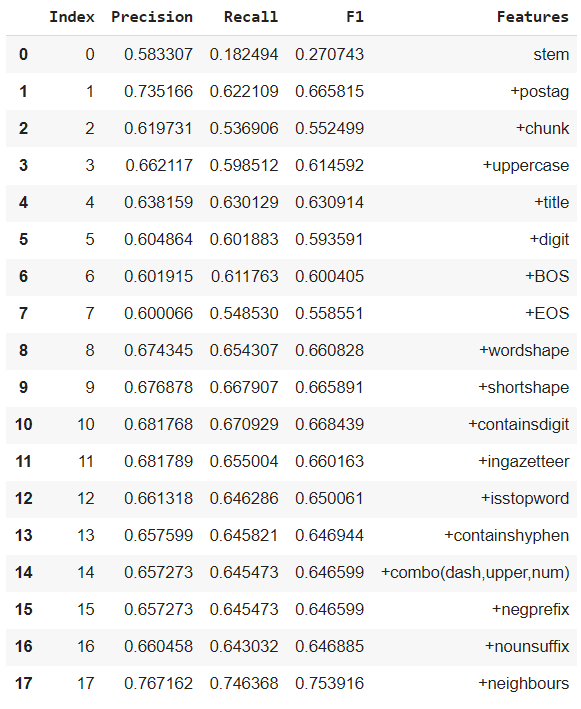

Stem alone is not enough. 

Postag greatly increases precision and f1. 

Chunk doesn't really increase much. 

Knowing if its uppercase or title(first letter uppercase) actually matters.

Weird enough, digits don't matter. 

I manually brought BOS and EOS forward in the features bc I thought they were impportant. They greatly increased f1 scores when they were the loast ones being added. But here? Not so much, and I'm not sure why. 

Like I said, after postag, the biggest change is neighbours. When neighbours are added, it finally starts to become ok. 

Note: I did not really do preprocessing in any parts of this hw. I have already done that in hw1. It also wasn't specified and I was just getting to know features and I didn't know how it could interfere. So I didn't. There is stemming in features anyways. Also, words in my gazetteer were not stemmed or stuff, since it's NER, I thought it would hinder me more than help. It'd lose me information, since it is not individual words I'm trying to guess, but entities. So, I chose to keep my data mostly as it was. 


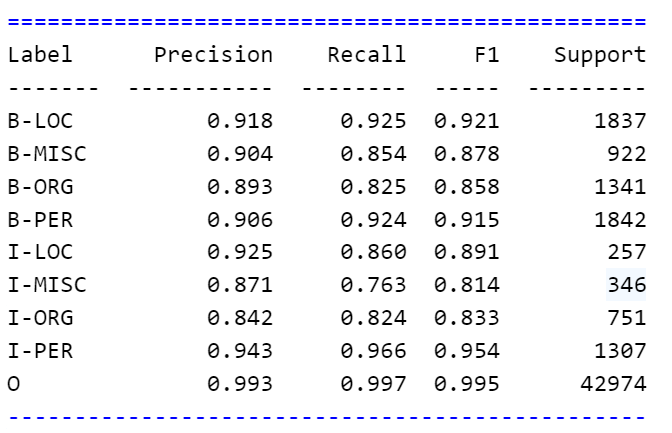






Since I've been told hyperparameter tuning wasn't necessary, I left c1 and c2 alone. I used generic 0.1 fo both. So for both Lasso and Ridge, I used the same constraints. 
My results are pretty good with every information I could provide. I-ORG and I-MISC are lowest, and it makes sense to me. Organization name sare long and similiar to each other, can have problems ith I-ORG and misc can be more ambiguous than the rest. So, this wasn't suprising. 

precision:0.8199428261915895

accuracy:0.9604628736740598

recall: 0.8335798816568047

f1: 0.8259905177786728

The overall score is ok. My f1 is 0.82 which is pretty good. Prrecision is low. That tells me there were maybe a lot of false positives. Recall is also not great, so false negatives. My overall accuracy is great, but those discrepancies are what lowers my f1 score, which is fair enough. 

***RNN***


The following is a snippet from my old report:


*Since my lists were already in the form of sentences and I did eliminate punctuation to make sure everything coresponded, and those were what I tokenized, padded and mapped. I created a w2v model, and also downloaded a pre_trained one (I did not train it myself this time, I lost points in hw1). I created their respective matrices. *
*I also had count lists (train_count, val_count, test_count) so that I know the length of sentences. I only had to use test_counts but I had the others too, just in case.*

*In my first try as I was doing the same thing as everyone (making my dataset into a dataframe and going from there) I got max_seq_length as 495, I tried to train that, took about 5.5 hours and was still not done.*


In my 2nd try, which I did all that you see but my padding was wrong. I got 0s in classification report all the time. Maybe a single 0.1? Turns out, because I was padding to the max_length of training data and I had longer sentences in the test data, when converting after predictions I was messing up. That has been solved now. Thank you Buse for helping me realize :) 



Funnily enough, that snipper isn't from the 1st rnn report I've written, it's the 2nd one as that implies. So here goes the 3rd:

Anyway, I have solved my problem. The problem was maximum length of sequence. The longest sequence was in test. And since I was taking the max length of training, when I was converting back, it got ruined. 
Plan: 
Create 3 models of different embeddings, mostly identical and simple. See which one performs the worst, use that one in a hyperparameter heavy big boy model. Ths is so that I can tell whether it is the embeddings that matter the most, or the hyperparameters.

I create a list of sentences of words like hw1 and train my w2v_model. 
Then I download a pretrained model with 100 dimensions bc that is what I've chosen for my embedding matrices.

My method: I keep a test_counts. It has the number of words in every sentence. I maplabels (my custom function), sequence, pad, encode(to_categorical). After prediction, I put the outcome through fixPredictions and I get the most probable outcoms and return as list. 
I then put it through a for loop which un-pads it and then I use maplabelsback (again, mine) to put B-LOC and stuff back instead of numbers. Then I print a classification report.


Like I said in the comments, I remove the last element bc the test_data has a single empty string. 

**Randomly Initialized:**

From the previous hw, I kind of knew this would perform the worst. So I created it as a baseline. It's only 8 epochs and has 2 bidirectional layers because I wanted to see if that could make the difference between rand and custom em matrix. It did not, the difference is pretty much the expected amount, so for efficiency's sake, I dropped it. 


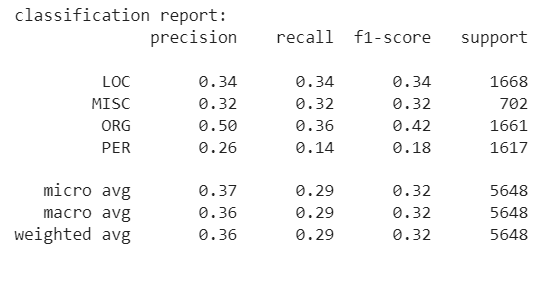

This is fine? Not very unexpected. There's no learning rat, no dropouts. I mostly did the embeddings the same to see which one performed best. I thought having 2 bidirectional layers would increase recursiveness. Looking at my custom embed results, it looks like it might've helped a lot. I'll keep that in mind for the last one. 

Looking at this report, it looks like Organizational names were ones the model was able to guess correctly the most. The avg of recall is lowest, which means it has more false negatives than false positives (precision).

Person is unexpectedly low, but I guess that is the one that can be unique most frequently. I'll keep an eye out in next report.

**Custom Trained W2V:**

Results are suprising to me. I expected it to be much higher. Maybe the double bidirectional layer of lstm is really the way to go. I don't know if its bc of embedding or layers, so I'll keep the next model same apart from embeddings to see. 


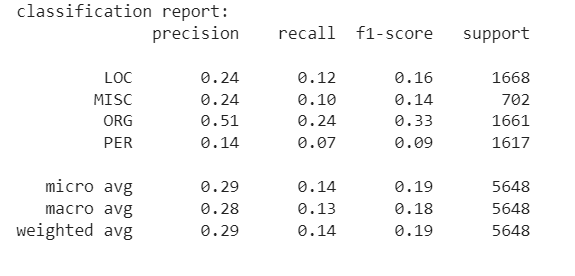

Look at Recall! The higher false negative problem is present here too. And the lowest ones are Person and Misc. That is suprising since the instances of Misc are already rare, those numbers mean the model really sucked at telling if smth was misc, but did increase the number of occurrences  bc Recall = tp/tp+fp and precision = tp/tp+fn and precision isn't that much lower than others. Looking at support, misc only occurs 702 times, much less than others. So the fact that precision isn't that low means that there weren't an abysmal amount of false negatives. But recall is LOW, so there were a lot of false positives. That is weird. It wanted to (and did) find much more misc than there was. 

Person is just abysmal. Maybe using some sort of gazetteer of common names could help. I understand why the model is having trouble there.

Overall, very bad. In hw1, these were much closer to eachother. I'll add dropout to model3 so that I can see if it matters. 

**Pretrained:**



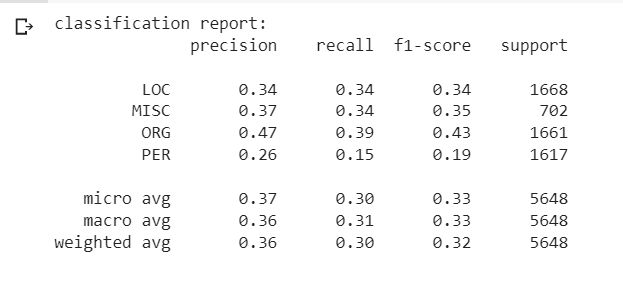

Again, a suprising outcome. It did improve, but slightly. (0.001)
This time though, it looks like dropout rate really helped MISC. Filtering has helped misc but again, looking at the difference between precision and recall, we have a lot of false positives. Again, OGANIZATION is highest, which is what we've learned. 

PERSON is higher than it was, but the proportions haven't really changed. There is a smaller false positive ratio compared to the previous one. (Prev was 0.14 to 0.7 but this one isn't 0.30 to 0.15 but 0.26, so that tells me recall improved a little bit). 

For the big boy (4th model) I'll use custom embeddings BUT I'll have 2 lstms and dropouts. We'll see how much it'll improve. Let's see what those hyperparameters really do for us, or is it just the embeddings?

One thing I haven't mentioned is learning_rate. ADAM has default of 0.001 which can be considered on the upper side for deep learning. So in this last one, in addition to layers and tuning, I'll add a lower learning rate. (0.0005)

Also also, the 1st one had 8 epochs but still performed best. Apparently the avg is 11, so that's what I used for others. 

**4TH MODEL: EMBEDDINGS vs HYPERPARAMETERS**



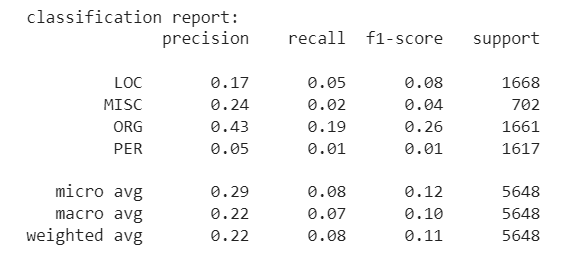

Person is the worst it has ever been. So is MISC. Recall is dead. The model might've gotten too complex and there might've been overfitting but I can't be sure bc the loss and accuracy we see in model training includes "Other". Same things here.False positives are SO MUCH. Location has also dipped. Organization is ok. 



The best one was pretrained with dropout. 

  Sources

  https://www.geeksforgeeks.org/read-json-file-using-python/

  https://stackoverflow.com/questions/47857154/how-to-read-json-object-in-python

https://readthedocs.org/projects/sklearn-crfsuite/downloads/pdf/latest/

https://github.com/scrapinghub/python-crfsuite/blob/master/examples/CoNLL%202002.ipynb

https://github.com/TeamHG-Memex/sklearn-crfsuite/issues/60

https://colab.research.google.com/github/practical-nlp/practical-nlp/blob/master/Ch5/02_NERTraining.ipynb#scrollTo=7bo-XzixcnBA

https://colab.research.google.com/drive/1KIlJu6Hr1PtLGKKr__mGomVn1Hp8Kbyn#scrollTo=vrMiQUoI_Vda

https://www.codespeedy.com/build-deep-neural-network-for-custom-ner-with-keras/

https://www.geeksforgeeks.org/choose-optimal-number-of-epochs-to-train-a-neural-network-in-keras/#:~:text=Therefore%2C%20the%20optimal%20number%20of,values%20against%20number%20of%20epochs.